## 1- Importando as bibliotecas 

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import zipfile 
import pickle
import matplotlib.pyplot as plt
import seaborn as sn

## 2- Obtendo arquivos por unidade de Estado  

## 2.1- ENEM 2017

In [2]:
#Obtendo o caminho dos arquivos que estão dentro da pasta zipada
with zipfile.ZipFile("../dados/microdados_enem_2017.zip") as z:
    print(*z.namelist(),sep="\n")

INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2017.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2017.R
INPUTS/INPUT_SAS_ITENS_PROVA_2017.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2017.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2017.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2017.sps
DADOS/
DADOS/ITENS_PROVA_2017.csv
DADOS/MICRODADOS_ENEM_2017.csv
DICION╡RIO/
DICION╡RIO/Dicionário_Microdados_Enem_2017.ods
DICION╡RIO/Dicionário_Microdados_Enem_2017.xlsx


In [3]:
#Abrindo o arquivo desejado "MICRODADOS_ENEM_2018"
with zipfile.ZipFile("../dados/microdados_enem_2017.zip") as z:
    with z.open('DADOS/MICRODADOS_ENEM_2017.csv') as f:
     %time microdadosEnem2017 = pd.read_csv(f,sep= ';', encoding= 'ISO-8859-1')

Wall time: 1min 23s


In [4]:
microdadosEnem2017.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,170003336736,2017,11,F,1,1,1,1,11,1,...,A,C,B,B,C,B,B,B,A,A
1,170003333545,2017,7,F,1,1,1,1,5,1,...,A,B,A,A,C,B,A,A,A,A
2,170001663644,2017,13,F,1,1,1,1,11,1,...,A,B,A,A,C,A,B,B,A,A
3,170001663645,2017,12,F,1,1,1,1,6,1,...,B,C,A,B,D,A,B,B,A,A
4,170001663646,2017,13,M,1,3,1,1,11,1,...,A,B,B,A,C,A,C,B,A,A


In [5]:
#Obtendo os itens das colunas para escolher o melhor filtro
microdadosEnem2017.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [6]:
#Selecionando só os dados relacionados ao Estado de Minas Gerais
microdadosEnem2017[microdadosEnem2017["SG_UF_ESC"] == 'MG'] 

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
414,170003336563,2017,12,M,1,3,1,2,0,2,...,A,B,A,A,B,B,B,B,B,A
817,170001665204,2017,3,M,1,1,1,2,0,2,...,A,B,A,A,B,A,B,A,B,A
820,170003335219,2017,2,F,1,1,1,2,0,2,...,A,B,B,A,E,A,B,A,B,A
832,170003339592,2017,2,M,1,1,1,2,0,2,...,A,B,A,A,D,A,B,B,B,A
880,170001666299,2017,12,F,2,3,1,2,0,2,...,A,B,A,A,B,A,A,A,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730882,170006718541,2017,5,M,1,3,1,2,0,2,...,A,B,A,A,C,B,B,B,B,A
6730959,170003268728,2017,12,M,1,1,1,2,0,2,...,A,C,A,B,B,B,B,B,C,A
6731117,170006720822,2017,18,M,2,1,1,2,0,2,...,A,B,A,A,C,A,B,B,B,A
6731215,170006718938,2017,2,F,1,3,1,2,0,2,...,B,B,B,A,C,A,A,A,B,A


In [7]:
#confirmando os Estados que estão presentes no arquivo
microdadosEnem2017["SG_UF_ESC"].unique()

array([nan, 'AM', 'BA', 'SP', 'PR', 'PI', 'DF', 'RJ', 'RS', 'PE', 'GO',
       'MG', 'CE', 'ES', 'PA', 'MS', 'AL', 'MT', 'TO', 'AP', 'SC', 'RO',
       'MA', 'RN', 'PB', 'SE', 'AC', 'RR'], dtype=object)

In [8]:
#Criando uma lista com os Estados presentes no arquivo
lista_UFs = microdadosEnem2017["SG_UF_ESC"].unique()

In [9]:
#Contando a quantidade de Estados do arquivo. Temos 28 pois o NaN (que não foi informado) está presente no arquivo,
#mas não há problema, quando fizermos o filtro apenas do Estado de Minas Gerais, ele irá desaparecer.
len(lista_UFs)

28

In [10]:
#iterando sobre cada iten da lista "lista_UFs" e salvando apenas os itens referentes ao Estado de Minas Gerais no formato csv
for uf in lista_UFs:
    caminho_do_arquivo = "../dados/microdados_enem_{}_2017.csv".format(uf) 
    microdadosEnem2017[microdadosEnem2017["SG_UF_ESC"] == uf].to_csv(caminho_do_arquivo) 

## 2.2- ENEM 2018

In [11]:
#Obtendo o caminho dos arquivos que estão dentro da pasta zipada
with zipfile.ZipFile("../dados/microdados_enem_2018.zip") as z:
    print(*z.namelist(),sep="\n")

DICION╡RIO/
DICION╡RIO/Dicionário_Microdados_Enem_2018.ods
DICION╡RIO/Dicionário_Microdados_Enem_2018.xlsx
INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2018.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2018.R
INPUTS/INPUT_SAS_ITENS_PROVA_2018.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2018.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2018.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2018.sps
DADOS/
DADOS/ITENS_PROVA_2018.csv
DADOS/MICRODADOS_ENEM_2018.csv


In [12]:
#Abrindo o arquivo desejado "MICRODADOS_ENEM_2018"
with zipfile.ZipFile("../dados/microdados_enem_2018.zip") as z:
    with z.open('DADOS/MICRODADOS_ENEM_2018.csv') as f:
     %time microdadosEnem2018 = pd.read_csv(f,sep= ';', encoding= 'ISO-8859-1')

Wall time: 53.1 s


In [13]:
%timeit
microdadosEnem2018.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186625,2018,2,F,0.0,4,1,2,0,4,...,B,C,B,B,D,B,C,B,B,D
1,180007186627,2018,3,F,0.0,4,1,1,1,1,...,A,B,A,A,B,A,A,A,A,A
2,180007186628,2018,3,M,0.0,0,1,2,0,2,...,A,B,B,A,D,A,A,A,B,A
3,180007186629,2018,2,F,0.0,3,1,2,0,4,...,A,C,A,B,D,B,A,B,B,B
4,180007186631,2018,11,F,0.0,5,1,1,6,1,...,A,B,B,A,C,A,B,A,A,A


In [14]:
#Obtendo os itens das colunas para escolher o melhor filtro
microdadosEnem2018.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [15]:
#Selecionando apenas os dados relacionados ao Estado de Minas Gerais
microdadosEnem2018[microdadosEnem2018["SG_UF_ESC"] == 'MG'] 

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2,180007186628,2018,3,M,0.0,0,1,2,0,2,...,A,B,B,A,D,A,A,A,B,A
5,180007186632,2018,2,F,0.0,3,1,2,0,2,...,A,B,B,A,D,A,A,B,B,B
71,180007186704,2018,11,M,0.0,3,1,2,0,2,...,A,A,A,A,B,B,B,B,B,A
123,180007186761,2018,12,F,0.0,3,1,2,0,2,...,A,B,A,A,B,A,A,A,B,A
132,180007186772,2018,2,M,0.0,3,1,2,0,2,...,A,B,A,A,C,A,B,B,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513219,180014001683,2018,3,F,0.0,1,1,2,0,2,...,B,B,B,B,B,B,B,A,B,A
5513266,180014001761,2018,2,M,0.0,0,1,2,0,2,...,A,C,A,A,D,A,B,B,B,A
5513463,180014002252,2018,4,M,0.0,2,1,2,0,2,...,A,D,B,A,E,B,C,B,B,A
5513492,180014002308,2018,7,M,0.0,1,1,2,0,2,...,A,C,A,A,C,B,B,B,B,A


In [16]:
#confirmando os Estados que estão presentes no arquivo
microdadosEnem2018["SG_UF_ESC"].unique()

array(['PA', nan, 'MG', 'BA', 'DF', 'SE', 'RJ', 'RS', 'SP', 'MT', 'CE',
       'SC', 'MA', 'PE', 'AL', 'PR', 'AM', 'MS', 'PB', 'PI', 'RN', 'GO',
       'AC', 'RO', 'ES', 'AP', 'RR', 'TO'], dtype=object)

In [17]:
#Criando uma lista com os Estados presentes no arquivo
lista_UFs = microdadosEnem2018["SG_UF_ESC"].unique()

In [18]:
#Contando a quantidade de Estados do arquivo. Temos 28 pois o NaN (que não foi informado) está presente no arquivo,
#mas não há problema, quando fizermos o filtro apenas do Estado de Minas Gerais, ele irá desaparecer.
len(lista_UFs)

28

In [19]:
#iterando sobre cada item da lista "lista_UFs" e salvando apenas os itens referentes ao Estado de Minas Gerais no formato csv
for uf in lista_UFs:
    caminho_do_arquivo = "../dados/microdados_enem_{}_2018.csv".format(uf) 
    microdadosEnem2018[microdadosEnem2018["SG_UF_ESC"] == uf].to_csv(caminho_do_arquivo) 

## 2.2- ENEM 2019

In [20]:
#Obtendo o caminho dos arquivos que estão dentro da pasta zipada
with zipfile.ZipFile("../dados/microdados_enem_2019.zip") as z:
    print(*z.namelist(),sep="\n")

INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2019.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2019.R
INPUTS/INPUT_SAS_ITENS_PROVA_2019.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2019.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2019.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2019.sps
DADOS/
DADOS/ITENS_PROVA_2019.csv
DADOS/MICRODADOS_ENEM_2019.csv
DICION╡RIO/
DICION╡RIO/Dicionário_Microdados_Enem_2019.ods
DICION╡RIO/Dicionário_Microdados_Enem_2019.xlsx


In [21]:
#Abrindo o arquivo desejado "MICRODADOS_ENEM_2018"
with zipfile.ZipFile("../dados/microdados_enem_2019.zip") as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
     %time microdadosEnem2019 = pd.read_csv(f,sep= ';', encoding= 'ISO-8859-1')

Wall time: 48.3 s


In [22]:
%timeit
microdadosEnem2019.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,13,M,1,3,1,1,11,1,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,8,M,1,1,1,1,5,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,13,F,1,3,1,1,13,1,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,10,F,1,1,1,1,4,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,7,F,1,1,1,1,4,1,...,B,A,A,B,A,A,C,B,B,B


In [23]:
#Obtendo os itens das colunas para escolher o melhor filtro
microdadosEnem2019.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [24]:
#Selecionando só os dados relacionados ao Estado de Minas Gerais
microdadosEnem2019[microdadosEnem2018["SG_UF_ESC"] == 'MG'] 

C:\Users\Arthur\AppData\Local\Temp/ipykernel_29500/2274562357.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  microdadosEnem2019[microdadosEnem2018["SG_UF_ESC"] == 'MG']


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,190001133210,2019,13,F,1,3,1,1,13,1,...,A,A,A,B,A,A,C,A,A,B
5,190001782198,2019,13,M,2,2,1,1,13,1,...,B,A,A,B,A,A,E,A,B,B
71,190001517224,2019,7,M,1,3,1,1,4,1,...,A,A,A,C,A,A,D,A,B,B
123,190001480446,2019,4,M,0,4,1,1,2,1,...,B,A,A,B,B,A,B,A,A,B
132,190001042840,2019,5,F,1,5,1,1,1,1,...,A,A,A,B,B,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095045,190005539803,2019,11,F,1,2,1,1,11,1,...,A,A,A,B,A,A,C,A,B,B
5095073,190005766801,2019,2,M,1,2,1,2,0,2,...,B,A,A,B,B,A,D,A,B,A
5095091,190005947160,2019,1,M,1,1,1,4,0,1,...,A,A,B,B,B,B,E,A,E,B
5095144,190005429223,2019,12,M,1,3,1,1,13,1,...,A,A,A,B,A,A,B,A,A,A


In [25]:
#confirmando os Estados que estão presentes no arquivo
microdadosEnem2019["SG_UF_ESC"].unique()

array([nan, 'MG', 'PR', 'RS', 'SP', 'BA', 'PB', 'AM', 'DF', 'CE', 'PI',
       'PA', 'RJ', 'RN', 'MS', 'MT', 'TO', 'AL', 'GO', 'AP', 'PE', 'SC',
       'ES', 'MA', 'RO', 'AC', 'SE', 'RR'], dtype=object)

In [26]:
#Criando uma lista com os Estados presentes no arquivo
lista_UFs = microdadosEnem2019["SG_UF_ESC"].unique()

In [27]:
#Contando a quantidade de Estados do arquivo. Temos 28 pois o NaN (que não foi informado) está presente no arquivo,
#mas não há problema, quando fizermos o filtro apenas do Estado de Minas Gerais, ele irá desaparecer.
len(lista_UFs)

28

In [28]:
#iterando sobre cada iten da lista "lista_UFs" e salvando apenas os itens referentes ao Estado de Minas Gerais no formato csv
for uf in lista_UFs:
    caminho_do_arquivo = "../dados/microdados_enem_{}_2019.csv".format(uf) 
    microdadosEnem2019[microdadosEnem2019["SG_UF_ESC"] == uf].to_csv(caminho_do_arquivo) 

## 2.3- ENEM 2020

In [29]:
#Obtendo o caminho dos arquivos que estão dentro da pasta zipada
with zipfile.ZipFile("../dados/microdados_enem_2020.zip") as z:
    print(*z.namelist(),sep="\n")

DICION╡RIO/
DICION╡RIO/Dicionário_Microdados_Enem_2020.ods
DICION╡RIO/Dicionário_Microdados_Enem_2020.xlsx
INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2020.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2020.R
INPUTS/INPUT_SAS_ITENS_PROVA_2020.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2020.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2020.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2020.sps
DADOS/
DADOS/ITENS_PROVA_2020.csv
DADOS/MICRODADOS_ENEM_2020.csv


In [30]:
#Abrindo o arquivo desejado "MICRODADOS_ENEM_2018"
with zipfile.ZipFile("../dados/microdados_enem_2020.zip") as z:
    with z.open('DADOS/MICRODADOS_ENEM_2020.csv') as f:
     %time microdadosEnem2020 = pd.read_csv(f,sep= ';', encoding= 'ISO-8859-1')

Wall time: 49.8 s


In [31]:
%timeit
microdadosEnem2020.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


In [32]:
#Obtendo os itens das colunas para escolher o melhor filtro
microdadosEnem2020.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [33]:
#Selecionando só os dados relacionados ao Estado de Minas Gerais
microdadosEnem2020[microdadosEnem2020["SG_UF_ESC"] == 'MG'] 

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
119,200006635187,2020,3,F,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,200006790742,2020,2,F,0,1,1,2,0,2,...,B,A,A,B,A,A,C,A,B,B
406,200006675118,2020,4,F,1,2,1,2,0,2,...,B,A,A,B,A,A,C,A,B,B
415,200004784978,2020,3,M,1,3,1,2,0,2,...,B,A,B,B,A,B,E,A,B,B
925,200002758774,2020,2,F,1,3,1,2,0,2,...,A,A,A,B,B,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5780915,200004829245,2020,2,F,1,1,1,2,0,2,...,B,A,A,B,B,A,C,A,B,B
5780973,200001410072,2020,1,M,0,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
5782162,200004772078,2020,3,F,1,2,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B
5782171,200003895235,2020,2,F,1,1,2,2,0,2,...,A,A,A,C,A,A,D,B,C,B


In [34]:
#confirmando os Estados que estão presentes no arquivo
microdadosEnem2020["SG_UF_ESC"].unique()

array([nan, 'BA', 'SP', 'AM', 'PI', 'MT', 'RJ', 'DF', 'CE', 'MG', 'ES',
       'RS', 'AL', 'SC', 'PR', 'RN', 'SE', 'PB', 'RO', 'PE', 'AP', 'PA',
       'GO', 'MA', 'MS', 'TO', 'RR', 'AC'], dtype=object)

In [35]:
#Criando uma lista com os Estados presentes no arquivo
lista_UFs = microdadosEnem2020["SG_UF_ESC"].unique()

In [36]:
#Contando a quantidade de Estados do arquivo. Temos 28 pois o NaN (que não foi informado) está presente no arquivo,
#mas não há problema, quando fizermos o filtro apenas do Estado de Minas Gerais, ele irá desaparecer.
len(lista_UFs)

28

In [37]:
#iterando sobre cada iten da lista "lista_UFs" e salvando apenas os itens referentes ao Estado de Minas Gerais no formato csv
for uf in lista_UFs:
    caminho_do_arquivo = "../dados/microdados_enem_{}_2020.csv".format(uf) 
    microdadosEnem2020[microdadosEnem2020["SG_UF_ESC"] == uf].to_csv(caminho_do_arquivo) 

## 2.4- ENEM 2021

In [38]:
#Obtendo o caminho dos arquivos que estão dentro da pasta zipada
with zipfile.ZipFile("../dados/microdados_enem_2021.zip") as z:
    print(*z.namelist(),sep="\n")

INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2021.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2021.R
INPUTS/INPUT_SAS_ITENS_PROVA_2021.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2021.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2021.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2021.sps
DADOS/
DADOS/ITENS_PROVA_2021.csv
DADOS/MICRODADOS_ENEM_2021.csv
DICION╡RIO/
DICION╡RIO/Dicionário_Microdados_Enem_2021.ods
DICION╡RIO/Dicionário_Microdados_Enem_2021.xlsx


In [39]:
#Abrindo o arquivo desejado "MICRODADOS_ENEM_2018"
with zipfile.ZipFile("../dados/microdados_enem_2021.zip") as z:
    with z.open('DADOS/MICRODADOS_ENEM_2021.csv') as f:
     %time microdadosEnem2021 = pd.read_csv(f,sep= ';', encoding= 'ISO-8859-1')

Wall time: 30.3 s


In [40]:
%timeit
microdadosEnem2021.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [41]:
#Obtendo os itens das colunas para escolher o melhor filtro
microdadosEnem2021.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [42]:
#Selecionando só os dados relacionados ao Estado de Minas Gerais
microdadosEnem2021[microdadosEnem2018["SG_UF_ESC"] == 'MG'] 

C:\Users\Arthur\AppData\Local\Temp/ipykernel_29500/1416840172.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  microdadosEnem2021[microdadosEnem2018["SG_UF_ESC"] == 'MG']


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
71,210053495342,2021,3,F,1,1,1,2,0,2,...,A,A,A,B,A,B,E,A,A,B
123,210054417703,2021,5,F,1,3,1,1,2,1,...,A,A,A,B,A,A,E,A,A,A
132,210054150471,2021,4,F,1,3,1,1,2,1,...,A,A,A,B,A,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389618,210052437252,2021,4,F,1,2,1,1,1,1,...,B,A,A,B,A,A,D,A,A,B
3389635,210053111487,2021,8,M,0,3,1,1,5,1,...,A,A,A,B,A,A,B,A,B,B
3389758,210053997893,2021,6,M,1,3,1,1,3,1,...,A,A,A,B,A,B,D,A,A,B
3389774,210052279383,2021,13,M,2,1,1,1,0,1,...,A,A,A,B,A,A,C,A,C,B


In [43]:
#confirmando os Estados que estão presentes no arquivo
microdadosEnem2021["SG_UF_ESC"].unique()

array([nan, 'CE', 'BA', 'ES', 'SP', 'PE', 'PA', 'RS', 'RJ', 'GO', 'DF',
       'MG', 'RN', 'MA', 'PI', 'AM', 'PR', 'AL', 'MT', 'SC', 'PB', 'RO',
       'SE', 'MS', 'TO', 'RR', 'AP', 'AC'], dtype=object)

In [44]:
#Criando uma lista com os Estados presentes no arquivo
lista_UFs = microdadosEnem2020["SG_UF_ESC"].unique()

In [45]:
#Contando a quantidade de Estados do arquivo. Temos 28 pois o NaN (que não foi informado) está presente no arquivo,
#mas não há problema, quando fizermos o filtro apenas do Estado de Minas Gerais, ele irá desaparecer.
len(lista_UFs)

28

In [46]:
#iterando sobre cada iten da lista "lista_UFs" e salvando apenas os itens referentes ao Estado de Minas Gerais no formato csv
for uf in lista_UFs:
    caminho_do_arquivo = "../dados/microdados_enem_{}_2021.csv".format(uf) 
    microdadosEnem2021[microdadosEnem2021["SG_UF_ESC"] == uf].to_csv(caminho_do_arquivo) 

## 3- Separando o IDHM apenas do Estado de MG

In [48]:
idh_mun_mg= pd.read_excel("../dados/censo_municipal.xlsx", sheet_name= "MUN 91-00-10", squeeze=True)

In [49]:
idh_mun_mg.shape

(16695, 237)

In [50]:
type(idh_mun_mg)

pandas.core.frame.DataFrame

In [51]:
idh_mun_mg.columns.values

array(['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'ESPVIDA',
       'FECTOT', 'MORT1', 'MORT5', 'RAZDEP', 'SOBRE40', 'SOBRE60',
       'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14', 'T_ANALF15A17',
       'T_ANALF15M', 'T_ANALF18A24', 'T_ANALF18M', 'T_ANALF25A29',
       'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_ATRASO_0_FUND',
       'T_ATRASO_0_MED', 'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND',
       'T_ATRASO_1_MED', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND',
       'T_ATRASO_2_MED', 'T_FBBAS', 'T_FBFUND', 'T_FBMED', 'T_FBPRE',
       'T_FBSUPER', 'T_FLBAS', 'T_FLFUND', 'T_FLMED', 'T_FLPRE',
       'T_FLSUPER', 'T_FREQ0A3', 'T_FREQ11A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FREQ25A29', 'T_FREQ4A5', 'T_FREQ4A6',
       'T_FREQ5A6', 'T_FREQ6', 'T_FREQ6A14', 'T_FREQ6A17',
       'T_FREQFUND1517', 'T_FREQFUND1824', 'T_FREQFUND45',
       'T_FREQMED1824', 'T_FREQMED614', 'T_FREQSUPER1517', 'T_FUND11A13',
       'T_FUND12A14', 'T_FUND15A17', 'T_FUND16A18', 'T_FUND18A24',
       'T_FUND18M', 'T_FU

In [52]:
idh_mun_mg.drop(['Codmun6', 'Codmun7', 'ESPVIDA',  'POP', 'I_ESCOLARIDADE',
       'FECTOT', 'MORT1', 'MORT5', 'RAZDEP', 'SOBRE40', 'SOBRE60',
       'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14', 'T_ANALF15A17',
       'T_ANALF15M', 'T_ANALF18A24', 'T_ANALF18M', 'T_ANALF25A29',
       'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_ATRASO_0_FUND',
       'T_ATRASO_0_MED', 'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND',
       'T_ATRASO_1_MED', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND',
       'T_ATRASO_2_MED', 'T_FBBAS', 'T_FBFUND', 'T_FBMED', 'T_FBPRE',
       'T_FBSUPER', 'T_FLBAS', 'T_FLFUND', 'T_FLMED', 'T_FLPRE',
       'T_FLSUPER', 'T_FREQ0A3', 'T_FREQ11A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FREQ25A29', 'T_FREQ4A5', 'T_FREQ4A6',
       'T_FREQ5A6', 'T_FREQ6', 'T_FREQ6A14', 'T_FREQ6A17',
       'T_FREQFUND1517', 'T_FREQFUND1824', 'T_FREQFUND45',
       'T_FREQMED1824', 'T_FREQMED614', 'T_FREQSUPER1517', 'T_FUND11A13',
       'T_FUND12A14', 'T_FUND15A17', 'T_FUND16A18', 'T_FUND18A24',
       'T_FUND18M', 'T_FUND25M', 'T_MED18A20', 'T_MED18A24', 'T_MED18M',
       'T_MED19A21', 'T_MED25M', 'T_SUPER25M', 'CORTE1', 'CORTE2',
       'CORTE3', 'CORTE4', 'CORTE9', 'GINI', 'PIND', 'PINDCRI', 'PMPOB',
       'PMPOBCRI', 'PPOB', 'PPOBCRI', 'PREN10RICOS', 'PREN20',
       'PREN20RICOS', 'PREN40', 'PREN60', 'PREN80', 'PRENTRAB', 'R1040',
       'R2040', 'RDPC', 'RDPC1', 'RDPC10', 'RDPC2', 'RDPC3', 'RDPC4',
       'RDPC5', 'RDPCT', 'RIND', 'RMPOB', 'RPOB', 'THEIL', 'CPR', 'EMP',
       'P_AGRO', 'P_COM', 'P_CONSTR', 'P_EXTR', 'P_FORMAL', 'P_FUND',
       'P_MED', 'P_SERV', 'P_SIUP', 'P_SUPER', 'P_TRANSF', 'REN0', 'REN1',
       'REN2', 'REN3', 'REN5', 'RENOCUP', 'T_ATIV', 'T_ATIV1014',
       'T_ATIV1517', 'T_ATIV1824', 'T_ATIV18M', 'T_ATIV2529', 'T_DES',
       'T_DES1014', 'T_DES1517', 'T_DES1824', 'T_DES18M', 'T_DES2529',
       'THEILtrab', 'TRABCC', 'TRABPUB', 'TRABSC', 'T_AGUA', 'T_BANAGUA',
       'T_DENS', 'T_LIXO', 'T_LUZ', 'AGUA_ESGOTO', 'PAREDE',
       'T_CRIFUNDIN_TODOS', 'T_FORA4A5', 'T_FORA6A14', 'T_FUNDIN_TODOS',
       'T_FUNDIN_TODOS_MMEIO', 'T_FUNDIN18MINF', 'T_M10A14CF',
       'T_M15A17CF', 'T_MULCHEFEFIF014', 'T_NESTUDA_NTRAB_MMEIO',
       'T_OCUPDESLOC_1', 'T_RMAXIDOSO', 'T_SLUZ', 'HOMEM0A4',
       'HOMEM10A14', 'HOMEM15A19', 'HOMEM20A24', 'HOMEM25A29',
       'HOMEM30A34', 'HOMEM35A39', 'HOMEM40A44', 'HOMEM45A49',
       'HOMEM50A54', 'HOMEM55A59', 'HOMEM5A9', 'HOMEM60A64', 'HOMEM65A69',
       'HOMEM70A74', 'HOMEM75A79', 'HOMEMTOT', 'HOMENS80', 'MULH0A4',
       'MULH10A14', 'MULH15A19', 'MULH20A24', 'MULH25A29', 'MULH30A34',
       'MULH35A39', 'MULH40A44', 'MULH45A49', 'MULH50A54', 'MULH55A59',
       'MULH5A9', 'MULH60A64', 'MULH65A69', 'MULH70A74', 'MULH75A79',
       'MULHER80', 'MULHERTOT', 'PEA', 'PEA1014', 'PEA1517', 'PEA18M',
       'peso1', 'PESO1114', 'PESO1113', 'PESO1214', 'peso13', 'PESO15',
       'peso1517', 'PESO1524', 'PESO1618', 'PESO18', 'Peso1820',
       'PESO1824', 'Peso1921', 'PESO25', 'peso4', 'peso5', 'peso6',
       'PESO610', 'Peso617', 'PESO65', 'PESOM1014', 'PESOM1517',
       'PESOM15M', 'PESOM25M', 'pesoRUR', 'pesotot', 'pesourb', 'PIA',
       'PIA1014', 'PIA1517', 'PIA18M', 'POP', 'POPT', 'I_ESCOLARIDADE',
       'I_FREQ_PROP', 'IDHM_E', 'IDHM_L', 'IDHM_R'], axis= 1, inplace= True)

In [53]:
idh_mun_mg= idh_mun_mg[idh_mun_mg["UF"] == 31]
idh_mun_mg.head()

,ANO,UF,Município,IDHM
2243,1991,31,Abadia dos Dourados,0.449
2244,1991,31,Abaeté,0.417
2245,1991,31,Abre Campo,0.379
2246,1991,31,Acaiaca,0.336
2247,1991,31,Açucena,0.267


In [54]:
idh_mun_mg= idh_mun_mg[idh_mun_mg["ANO"] == 2010]
idh_mun_mg.head()

,ANO,UF,Município,IDHM
13373,2010,31,Abadia dos Dourados,0.689
13374,2010,31,Abaeté,0.698
13375,2010,31,Abre Campo,0.654
13376,2010,31,Acaiaca,0.630
13377,2010,31,Açucena,0.610


In [55]:
idh_mun_mg.shape

(853, 4)

In [56]:
idh_mun_mg.drop_duplicates(subset= "Município", keep= "first", inplace= True)

In [57]:
idh_mun_mg.shape

(853, 4)

In [58]:
idh_mun_mg.head()

,ANO,UF,Município,IDHM
13373,2010,31,Abadia dos Dourados,0.689
13374,2010,31,Abaeté,0.698
13375,2010,31,Abre Campo,0.654
13376,2010,31,Acaiaca,0.630
13377,2010,31,Açucena,0.610


In [59]:
idh_mun_mg.reset_index(inplace=True)
idh_mun_mg.head()

,index,ANO,UF,Município,IDHM
0,13373,2010,31,Abadia dos Dourados,0.689
1,13374,2010,31,Abaeté,0.698
2,13375,2010,31,Abre Campo,0.654
3,13376,2010,31,Acaiaca,0.630
4,13377,2010,31,Açucena,0.610


In [60]:
idh_mun_mg.drop(['index', 'ANO', 'UF'], axis= 1, inplace= True)
idh_mun_mg.head()

,Município,IDHM
0,Abadia dos Dourados,0.689
1,Abaeté,0.698
2,Abre Campo,0.654
3,Acaiaca,0.630
4,Açucena,0.610


In [61]:
idh_mun_mg.shape

(853, 2)

In [62]:
idh_mun_mg.rename(columns={'Município':'NO_MUNICIPIO_ESC'}, inplace= True)
idh_mun_mg.head()

,NO_MUNICIPIO_ESC,IDHM
0,Abadia dos Dourados,0.689
1,Abaeté,0.698
2,Abre Campo,0.654
3,Acaiaca,0.630
4,Açucena,0.610


In [63]:
len(idh_mun_mg)

853

In [64]:
idh_mun_mg.nunique()

NO_MUNICIPIO_ESC    853
IDHM                223
dtype: int64

# 4- Tabelas do ENEM 2017 a 2021

In [65]:
#carregando os arquivos que serão utilizados no estudo
enem_2017= pd.read_csv("../dados/microdados_enem_MG_2017.csv", squeeze=True)
enem_2018= pd.read_csv("../dados/microdados_enem_MG_2018.csv", squeeze=True)
enem_2019= pd.read_csv("../dados/microdados_enem_MG_2019.csv", squeeze=True)
enem_2020= pd.read_csv("../dados/microdados_enem_MG_2020.csv", squeeze=True)
enem_2021= pd.read_csv("../dados/microdados_enem_MG_2021.csv", squeeze=True)

## 5-  Matriz de correlação  relacionando os melhores parâmetros (que têm maior similatidade/correlação) entre si, para decidir quais parêmetros serão utilizados

In [66]:
#Carregando dados do ENEM 2017 para analisar correlações
enem_2017_cor= pd.read_csv("../dados/microdados_enem_MG_2017.csv", squeeze=True)
enem_2017_cor.shape

(177552, 79)

In [67]:
#Adicionando o IDH na tabela do ENEM 2017
tab_mat_cor= pd.merge(enem_2017_cor, idh_mun_mg, on= 'NO_MUNICIPIO_ESC' )
tab_mat_cor.shape

(177482, 80)

In [68]:
tab_mat_cor.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q0

In [69]:
#Alterando o valor categórico das colunas das questões 26 para numérico inteiro
tab_mat_cor['Q026'].replace({'A':1,'B':2,'C':3,'D':4}, inplace= True)
tab_mat_cor.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IDHM
0,414,170003336563,2017,12,M,1,3,1,2,0,...,B,A,A,B,B,B,B,2,A,0.756
1,2699,170001665215,2017,4,F,1,3,1,2,0,...,B,A,A,C,A,A,B,2,A,0.756
2,5108,170003327468,2017,2,M,1,2,1,2,0,...,B,B,B,C,A,C,B,2,E,0.756
3,5726,170001668936,2017,15,F,3,3,1,2,0,...,B,B,A,B,A,B,B,2,A,0.756
4,7312,170003348840,2017,5,F,1,3,1,2,0,...,B,B,A,C,A,A,B,2,A,0.756


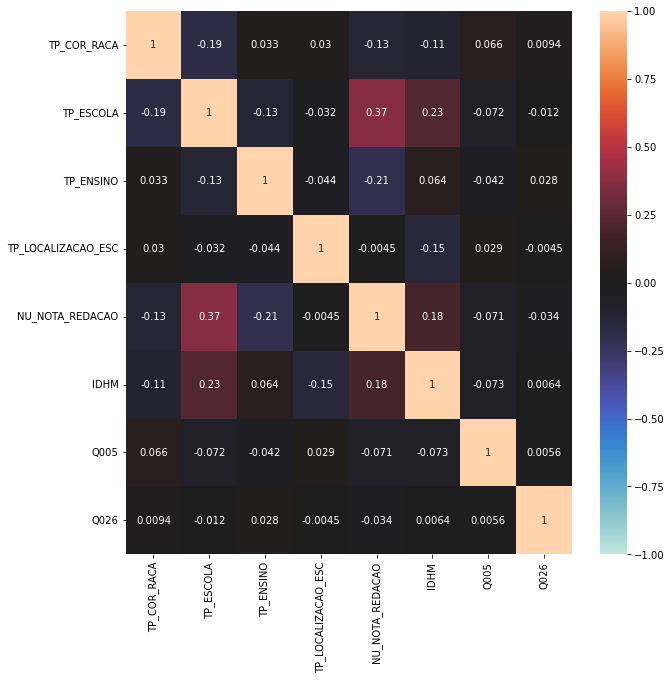

In [70]:
#realizando o plot da matriz de correlação
correlacao = tab_mat_cor[['TP_SEXO','TP_COR_RACA','TP_ESCOLA', 'TP_ENSINO', 'TP_LOCALIZACAO_ESC',\
                          'NU_NOTA_REDACAO', 'IDHM', 'Q005', 'Q026']].corr()

plt.figure(figsize=(10, 10))   
matriz_de_correlação = correlacao  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

## 6- Processando Tabelas do ENEM 
## 6.1- ENEM 2017

In [71]:
#obtendo o nome das colunas presentes no arquivo csv
enem_2017.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q0

In [72]:
#exluindo as colunas que não serão utilizadas para o estudo
enem_2017.drop( ['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027'], axis= 1, inplace=True)
enem_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2,Contagem,1.0,551.8,510.8,519.0,409.4,340.0
1,2,Patrocínio,1.0,583.7,664.3,580.7,672.4,720.0
2,2,Uberaba,1.0,535.2,520.7,535.2,412.5,580.0
3,2,Machado,2.0,573.9,618.0,567.2,721.9,540.0
4,2,Ribeirão das Neves,1.0,NaN,572.9,540.2,NaN,480.0


In [73]:
#analisando a quantidade de itens no arquivo
enem_2017.shape

(177552, 8)

In [74]:
enem_2017["MEDIA_NOTAS"]= (enem_2017.NU_NOTA_CN+ enem_2017.NU_NOTA_CH+ enem_2017.NU_NOTA_LC+ enem_2017.NU_NOTA_MT+\
                           enem_2017.NU_NOTA_REDACAO)/5
enem_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Contagem,1.0,551.8,510.8,519.0,409.4,340.0,466.20
1,2,Patrocínio,1.0,583.7,664.3,580.7,672.4,720.0,644.22
2,2,Uberaba,1.0,535.2,520.7,535.2,412.5,580.0,516.72
3,2,Machado,2.0,573.9,618.0,567.2,721.9,540.0,604.20
4,2,Ribeirão das Neves,1.0,NaN,572.9,540.2,NaN,480.0,NaN


In [75]:
enem_2017.shape

(177552, 9)

## 6.1.1- Preparando Tabela sem os zeros (alunos que participaram de todas as provas e obtiveram notas nelas) do ENEM 2017

In [76]:
#Fazendo a copia profunda
enem_sem_zero_2017= pickle.loads(pickle.dumps(enem_2017))
enem_sem_zero_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Contagem,1.0,551.8,510.8,519.0,409.4,340.0,466.20
1,2,Patrocínio,1.0,583.7,664.3,580.7,672.4,720.0,644.22
2,2,Uberaba,1.0,535.2,520.7,535.2,412.5,580.0,516.72
3,2,Machado,2.0,573.9,618.0,567.2,721.9,540.0,604.20
4,2,Ribeirão das Neves,1.0,NaN,572.9,540.2,NaN,480.0,NaN


In [77]:
enem_sem_zero_2017.shape

(177552, 9)

In [78]:
#Excluindo todas as linhas que possuem qualquer valor "NaN"
enem_sem_zero_2017.dropna(axis= 0, inplace=True)
enem_sem_zero_2017.shape

(139234, 9)

In [79]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_sem_zero_2017.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_sem_zero_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Contagem,1.0,466.20
1,2,Patrocínio,1.0,644.22
2,2,Uberaba,1.0,516.72
3,2,Machado,2.0,604.20
5,2,Varginha,1.0,607.78


In [80]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_sem_zero_2017['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_sem_zero_2017['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_sem_zero_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Contagem,Urbana,466.20
1,pública,Patrocínio,Urbana,644.22
2,pública,Uberaba,Urbana,516.72
3,pública,Machado,Rural,604.20
5,pública,Varginha,Urbana,607.78


In [81]:
#Alterando o nome das colunas
enem_sem_zero_2017.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_sem_zero_2017.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Contagem,Urbana,466.20
1,pública,Patrocínio,Urbana,644.22
2,pública,Uberaba,Urbana,516.72
3,pública,Machado,Rural,604.20
5,pública,Varginha,Urbana,607.78


## 6.1.2- Preparando Tabela com os zeros (qualquer aluno que tenha obtido nota em pelo menos uma das cinco provas) - ENEM 2017

In [82]:
#Fazendo a copia profunda
enem_geral_2017= pickle.loads(pickle.dumps(enem_2017))
enem_geral_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Contagem,1.0,551.8,510.8,519.0,409.4,340.0,466.20
1,2,Patrocínio,1.0,583.7,664.3,580.7,672.4,720.0,644.22
2,2,Uberaba,1.0,535.2,520.7,535.2,412.5,580.0,516.72
3,2,Machado,2.0,573.9,618.0,567.2,721.9,540.0,604.20
4,2,Ribeirão das Neves,1.0,NaN,572.9,540.2,NaN,480.0,NaN


In [83]:
enem_geral_2017.shape

(177552, 9)

In [84]:
#excluindo os alunos que não obtiveram nota (alunos faltantes e eliminados)
enem_geral_2017.dropna(thresh= 5, axis=0, inplace=True)
enem_geral_2017.shape

(146285, 9)

In [85]:
# trocando todos os valores "NaN" por 0.
enem_geral_2017.fillna(0, inplace= True)
enem_geral_2017.shape

(146285, 9)

In [86]:
enem_geral_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Contagem,1.0,551.8,510.8,519.0,409.4,340.0,466.20
1,2,Patrocínio,1.0,583.7,664.3,580.7,672.4,720.0,644.22
2,2,Uberaba,1.0,535.2,520.7,535.2,412.5,580.0,516.72
3,2,Machado,2.0,573.9,618.0,567.2,721.9,540.0,604.20
4,2,Ribeirão das Neves,1.0,0.0,572.9,540.2,0.0,480.0,0.00


In [87]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_geral_2017.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_geral_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Contagem,1.0,466.20
1,2,Patrocínio,1.0,644.22
2,2,Uberaba,1.0,516.72
3,2,Machado,2.0,604.20
4,2,Ribeirão das Neves,1.0,0.00


In [88]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_geral_2017['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_geral_2017['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_geral_2017.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Contagem,Urbana,466.20
1,pública,Patrocínio,Urbana,644.22
2,pública,Uberaba,Urbana,516.72
3,pública,Machado,Rural,604.20
4,pública,Ribeirão das Neves,Urbana,0.00


In [89]:
#Alterando o nome das colunas
enem_geral_2017.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_geral_2017.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Contagem,Urbana,466.20
1,pública,Patrocínio,Urbana,644.22
2,pública,Uberaba,Urbana,516.72
3,pública,Machado,Rural,604.20
4,pública,Ribeirão das Neves,Urbana,0.00


In [90]:
Val_Unico_E2017 = enem_2017.nunique(axis=0)
print("números únicos em cada coluna :\n",Val_Unico_E2017)

números únicos em cada coluna :
 TP_ESCOLA                 3
NO_MUNICIPIO_ESC        853
TP_LOCALIZACAO_ESC        2
NU_NOTA_CN             3731
NU_NOTA_CH             4240
NU_NOTA_LC             3906
NU_NOTA_MT             5552
NU_NOTA_REDACAO          50
MEDIA_NOTAS           29675
dtype: int64


## 6.1.3- Obtendo a Quantidade de Alunos por Municipio, Localização e por Tipo de Escola - ENEM 2017

In [91]:
#Quantidade de Participantes por Município
Qtd_alunos_Mun_Enem_2017 = enem_geral_2017.filter(items= ["MUNICIPIO", "MEDIA_NOTAS"]).groupby("MUNICIPIO").count()\
.sort_values(by= "MEDIA_NOTAS", ascending= False)

In [92]:
Qtd_alunos_Mun_Enem_2017.columns= ['QTD ALUNOS'] 
Qtd_alunos_Mun_Enem_2017.head()

,QTD ALUNOS
MUNICIPIO,
Belo Horizonte,20369
Uberlândia,5201
Contagem,4797
Juiz de Fora,4108
Montes Claros,3823


In [93]:
#Quantidade de participantes por tipo de escola 
alunos_tipo_esc_enem_2017= enem_geral_2017.filter(items= ["ESCOLA", "MEDIA_NOTAS"]).groupby("ESCOLA").count()\
.sort_values(by= "ESCOLA", ascending= False)

alunos_tipo_esc_enem_2017.columns= ['QTD ALUNOS']
alunos_tipo_esc_enem_2017.head()

,QTD ALUNOS
ESCOLA,
pública,123724
privada,22180
exterior,381


In [94]:
#Quantidade de participantes por tipo localização 
alunos_localizacao_esc_enem_2017= enem_geral_2017.filter(items= ["LOCALIZACAO", "MEDIA_NOTAS"]).groupby("LOCALIZACAO").count()\
.sort_values(by= "LOCALIZACAO", ascending= False)

In [95]:
alunos_localizacao_esc_enem_2017.columns= ['QTD ALUNOS']
alunos_localizacao_esc_enem_2017.head()

,QTD ALUNOS
LOCALIZACAO,
Urbana,143116
Rural,3169


## 6.1.4- Filtrando a Média dos Alunos por Município - ENEM 2017

In [96]:
enem_sem_zero_2017.shape

(139234, 4)

In [97]:
#Filtrando, agrupando e tirando a médias de todos os participantes de cada Município do Estado de Minas Gerais
media_municipios_2017= enem_sem_zero_2017.filter(items= ['MUNICIPIO', 'MEDIA_NOTAS']).groupby(['MUNICIPIO'])\
.mean().sort_values('MEDIA_NOTAS', ascending= False)

media_municipios_2017.head()

,MEDIA_NOTAS
MUNICIPIO,
Viçosa,581.828789
Florestal,581.817018
Coronel Xavier Chaves,570.789032
Timóteo,568.265856
Juiz de Fora,566.911465


In [98]:
media_municipios_2017.shape

(853, 1)

## 6.1.5- Tabela Média (obteve nota em todas as provas) ENEM e IDH (Censo) - ENEM 2017

In [99]:
#Alterando o nome da coluna "NO_MUNICIPIO_ESC" para "MUNICIPIO" do DataFrame "idh_mun_mg"  
idh_mun_mg.rename(columns={'NO_MUNICIPIO_ESC':'MUNICIPIO'}, inplace= True)
idh_mun_mg.head()

,MUNICIPIO,IDHM
0,Abadia dos Dourados,0.689
1,Abaeté,0.698
2,Abre Campo,0.654
3,Acaiaca,0.630
4,Açucena,0.610


In [100]:
#Criando tabela unindo o IDH do censo municipal com a média municipal dos alunos do ENEM
tabela_enem_idhm_2017= pd.merge(media_municipios_2017, idh_mun_mg, on= "MUNICIPIO")

In [101]:
#Comparando a quantidade de municipios listados
idh_mun_mg.nunique()

MUNICIPIO    853
IDHM         223
dtype: int64

In [102]:
#Comparando a quantidade de municipios listados
media_municipios_2017.nunique()

MEDIA_NOTAS    853
dtype: int64

In [103]:
#Alterando o nome das colunas
tabela_enem_idhm_2017.columns = ['MUNICIPIO', 'NOTA_2017', 'IDHM_2017']
tabela_enem_idhm_2017.head()

,MUNICIPIO,NOTA_2017,IDHM_2017
0,Viçosa,581.828789,0.775
1,Florestal,581.817018,0.724
2,Coronel Xavier Chaves,570.789032,0.677
3,Timóteo,568.265856,0.770
4,Juiz de Fora,566.911465,0.778


In [104]:
#Quantidade de items na coluna "MUNICIPIO", ou seja, contém 852 Municípios participantes
len(tabela_enem_idhm_2017['MUNICIPIO'])

852

In [105]:
#Conferindo se a tabela tem valores nulos (observa-se que não tem, pois o retorno é uma tabela vazia)
tabela_enem_idhm_2017[tabela_enem_idhm_2017.isnull().any(axis= 1)]

,MUNICIPIO,NOTA_2017,IDHM_2017


## 6.2- ENEM 2018

In [106]:
#Verificando as colunas existentes
enem_2018.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q0

In [107]:
#Excluindo as colunas que não serão necessárias
enem_2018.drop(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'Q026', 'Q027',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],axis= 1, inplace= True)
enem_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2,Rio Pardo de Minas,1.0,470.6,473.8,534.4,410.4,600.0
1,2,São Francisco,1.0,415.9,485.6,512.5,534.9,540.0
2,2,Boa Esperança,1.0,523.6,644.0,559.3,532.3,520.0
3,2,Vespasiano,1.0,NaN,NaN,NaN,NaN,NaN
4,2,Montalvânia,1.0,544.5,611.3,487.8,600.1,560.0


In [108]:
#criando coluna com média das notas dos participantes
enem_2018["MEDIA_NOTAS"]= (enem_2018.NU_NOTA_CN+ enem_2018.NU_NOTA_CH+ enem_2018.NU_NOTA_LC+ enem_2018.NU_NOTA_MT+\
                           enem_2018.NU_NOTA_REDACAO)/5
enem_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Rio Pardo de Minas,1.0,470.6,473.8,534.4,410.4,600.0,497.84
1,2,São Francisco,1.0,415.9,485.6,512.5,534.9,540.0,497.78
2,2,Boa Esperança,1.0,523.6,644.0,559.3,532.3,520.0,555.84
3,2,Vespasiano,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Montalvânia,1.0,544.5,611.3,487.8,600.1,560.0,560.74


In [109]:
#analisando a quantidade de itens no arquivo
enem_2018.shape

(137963, 9)

## 6.2.1- Preparando Tabela sem os zeros (alunos que participaram de todas as provas e obtiveram notas nelas) do ENEM 2018

In [110]:
#Fazendo a copia profunda
enem_sem_zero_2018= pickle.loads(pickle.dumps(enem_2018))
enem_sem_zero_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Rio Pardo de Minas,1.0,470.6,473.8,534.4,410.4,600.0,497.84
1,2,São Francisco,1.0,415.9,485.6,512.5,534.9,540.0,497.78
2,2,Boa Esperança,1.0,523.6,644.0,559.3,532.3,520.0,555.84
3,2,Vespasiano,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Montalvânia,1.0,544.5,611.3,487.8,600.1,560.0,560.74


In [111]:
enem_sem_zero_2018.shape

(137963, 9)

In [112]:
#Excluindo todas as linhas que possuem qualquer valor "NaN"
enem_sem_zero_2018.dropna(axis= 0, inplace=True)
enem_sem_zero_2018.shape

(112336, 9)

In [113]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_sem_zero_2018.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_sem_zero_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Rio Pardo de Minas,1.0,497.84
1,2,São Francisco,1.0,497.78
2,2,Boa Esperança,1.0,555.84
4,2,Montalvânia,1.0,560.74
5,2,Mateus Leme,1.0,582.10


In [114]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_sem_zero_2018['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_sem_zero_2018['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_sem_zero_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Rio Pardo de Minas,Urbana,497.84
1,pública,São Francisco,Urbana,497.78
2,pública,Boa Esperança,Urbana,555.84
4,pública,Montalvânia,Urbana,560.74
5,pública,Mateus Leme,Urbana,582.10


In [115]:
#Alterando o nome das colunas
enem_sem_zero_2018.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_sem_zero_2018.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Rio Pardo de Minas,Urbana,497.84
1,pública,São Francisco,Urbana,497.78
2,pública,Boa Esperança,Urbana,555.84
4,pública,Montalvânia,Urbana,560.74
5,pública,Mateus Leme,Urbana,582.10


## 6.2.2- Preparando Tabela com os zeros (qualquer aluno que tenha obtido nota em pelo menos uma das cinco provas) do ENEM 2018

In [116]:
#Fazendo a copia profunda
enem_geral_2018= pickle.loads(pickle.dumps(enem_2018))
enem_geral_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Rio Pardo de Minas,1.0,470.6,473.8,534.4,410.4,600.0,497.84
1,2,São Francisco,1.0,415.9,485.6,512.5,534.9,540.0,497.78
2,2,Boa Esperança,1.0,523.6,644.0,559.3,532.3,520.0,555.84
3,2,Vespasiano,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Montalvânia,1.0,544.5,611.3,487.8,600.1,560.0,560.74


In [117]:
enem_geral_2018.shape

(137963, 9)

In [118]:
#excluindo os alunos que não obtiveram nota (alunos faltantes e eliminados)
enem_geral_2018.dropna(thresh= 5, axis=0, inplace=True)
enem_geral_2018.shape

(117673, 9)

In [119]:
# trocando todos os valores "NaN" por 0.
enem_geral_2018.fillna(0, inplace= True)
enem_geral_2018.shape

(117673, 9)

In [120]:
enem_geral_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Rio Pardo de Minas,1.0,470.6,473.8,534.4,410.4,600.0,497.84
1,2,São Francisco,1.0,415.9,485.6,512.5,534.9,540.0,497.78
2,2,Boa Esperança,1.0,523.6,644.0,559.3,532.3,520.0,555.84
4,2,Montalvânia,1.0,544.5,611.3,487.8,600.1,560.0,560.74
5,2,Mateus Leme,1.0,503.3,630.5,577.0,479.7,720.0,582.10


In [121]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_geral_2018.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_geral_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Rio Pardo de Minas,1.0,497.84
1,2,São Francisco,1.0,497.78
2,2,Boa Esperança,1.0,555.84
4,2,Montalvânia,1.0,560.74
5,2,Mateus Leme,1.0,582.10


In [122]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_geral_2018['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_geral_2018['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_geral_2018.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Rio Pardo de Minas,Urbana,497.84
1,pública,São Francisco,Urbana,497.78
2,pública,Boa Esperança,Urbana,555.84
4,pública,Montalvânia,Urbana,560.74
5,pública,Mateus Leme,Urbana,582.10


In [123]:
#Alterando o nome das colunas
enem_geral_2018.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_geral_2018.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Rio Pardo de Minas,Urbana,497.84
1,pública,São Francisco,Urbana,497.78
2,pública,Boa Esperança,Urbana,555.84
4,pública,Montalvânia,Urbana,560.74
5,pública,Mateus Leme,Urbana,582.10


In [124]:
Val_Unico_E2018 = enem_geral_2018.nunique(axis=0)
print("números únicos em cada coluna :\n",Val_Unico_E2018)

números únicos em cada coluna :
 ESCOLA             4
MUNICIPIO        852
LOCALIZACAO        2
MEDIA_NOTAS    28406
dtype: int64


## 6.2.3- Obtendo a Quantidade de Alunos por Municipio, Localização e por Tipo de Escola - ENEM 2018

In [125]:
#Quantidade de Participantes por Município (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
Qtd_alunos_Mun_Enem_2018 = enem_geral_2018.filter(items= ["MUNICIPIO", "MEDIA_NOTAS"]).groupby("MUNICIPIO").count()\
.sort_values(by= "MEDIA_NOTAS", ascending= False)

Qtd_alunos_Mun_Enem_2018.columns= ['QTD ALUNOS'] 

Qtd_alunos_Mun_Enem_2018.head()

,QTD ALUNOS
MUNICIPIO,
Belo Horizonte,16515
Uberlândia,4020
Contagem,3600
Juiz de Fora,3443
Montes Claros,3187


In [126]:
#Quantidade de participantes por tipo de escola (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_tipo_esc_enem_2018= enem_geral_2018.filter(items= ["ESCOLA", "MEDIA_NOTAS"]).groupby("ESCOLA").count()\
.sort_values(by= "ESCOLA", ascending= False)

alunos_tipo_esc_enem_2018.columns= ['QTD ALUNOS']

alunos_tipo_esc_enem_2018.head()

,QTD ALUNOS
ESCOLA,
pública,89666
privada,1336
não respondeu,5589
exterior,21082


In [127]:
#Quantidade de participantes por tipo localização (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_localizacao_esc_enem_2018= enem_geral_2018.filter(items= ["LOCALIZACAO", "MEDIA_NOTAS"]).groupby("LOCALIZACAO").count()\
.sort_values(by= "LOCALIZACAO", ascending= False)

alunos_localizacao_esc_enem_2018.columns= ['QTD ALUNOS']

alunos_localizacao_esc_enem_2018.head()

,QTD ALUNOS
LOCALIZACAO,
Urbana,114803
Rural,2870


## 6.2.4- Filtrando a Média dos Alunos por Município - ENEM 2018

In [128]:
#esse dataframe se destina as analises feitas sem os zeros, o que significa que nos interessa agora a média real
#obtida pelos alunos que fizeram todas as provas e tiveram média referente a elas.
enem_sem_zero_2018.shape

(112336, 4)

In [129]:
media_municipios_2018= enem_sem_zero_2018.filter(items= ['MUNICIPIO', 'MEDIA_NOTAS']).groupby(['MUNICIPIO'])\
.mean().sort_values('MEDIA_NOTAS', ascending= False)

media_municipios_2018.head()

,MEDIA_NOTAS
MUNICIPIO,
Viçosa,611.770255
Coronel Xavier Chaves,590.010370
Timóteo,589.748237
Nova Lima,584.741556
Juiz de Fora,584.153248


## 6.2.5- Tabela Média (obteve nota em todas as provas) ENEM e IDH (Censo) - ENEM 2018

In [130]:
#Criando tabela unindo o IDH do censo municipal com a média municipal dos alunos do ENEM
tabela_enem_idhm_2018= pd.merge(media_municipios_2018, idh_mun_mg, on= "MUNICIPIO")

In [131]:
#Comparando a quantidade de municipios listados
idh_mun_mg.nunique()

MUNICIPIO    853
IDHM         223
dtype: int64

In [132]:
#Comparando a quantidade de municipios listados
media_municipios_2018.nunique()

MEDIA_NOTAS    851
dtype: int64

In [133]:
#Alterando o nome das colunas
tabela_enem_idhm_2018.columns = ['MUNICIPIO', 'NOTA_2018', 'IDHM_2018']
tabela_enem_idhm_2018.head()

,MUNICIPIO,NOTA_2018,IDHM_2018
0,Viçosa,611.770255,0.775
1,Coronel Xavier Chaves,590.010370,0.677
2,Timóteo,589.748237,0.770
3,Nova Lima,584.741556,0.813
4,Juiz de Fora,584.153248,0.778


In [134]:
#Quantidade de items na coluna "MUNICIPIO", ou seja, contém 852 Municípios participantes
len(tabela_enem_idhm_2018['MUNICIPIO'])

849

In [135]:
#Conferindo se a tabela tem valores nulos (observa-se que não tem, pois o retorno é uma tabela vazia)
tabela_enem_idhm_2018[tabela_enem_idhm_2018.isnull().any(axis= 1)]

,MUNICIPIO,NOTA_2018,IDHM_2018


In [136]:
#Outra forma de conferir se a tabela tem valores nulos.
tabela_enem_idhm_2018.isnull().sum()

MUNICIPIO    0
NOTA_2018    0
IDHM_2018    0
dtype: int64

## 6.3- ENEM 2019

In [137]:
#Verificando as colunas existentes
enem_2019.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q0

In [138]:
#Excluindo as colunas que não serão necessárias
enem_2019.drop(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],axis= 1, inplace= True)
enem_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2,Uberlândia,1.0,NaN,NaN,NaN,NaN,NaN
1,2,São Gotardo,1.0,NaN,514.3,554.4,NaN,500.0
2,2,Extrema,1.0,624.5,636.9,635.8,698.7,800.0
3,2,Belo Horizonte,1.0,421.6,381.0,463.0,449.0,420.0
4,2,Belo Horizonte,1.0,585.3,647.2,606.0,720.5,960.0


In [139]:
#criando coluna com média das notas dos participantes
enem_2019["MEDIA_NOTAS"]= (enem_2019.NU_NOTA_CN+ enem_2019.NU_NOTA_CH+ enem_2019.NU_NOTA_LC+ enem_2019.NU_NOTA_MT+\
                           enem_2019.NU_NOTA_REDACAO)/5
enem_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Uberlândia,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,São Gotardo,1.0,NaN,514.3,554.4,NaN,500.0,NaN
2,2,Extrema,1.0,624.5,636.9,635.8,698.7,800.0,679.18
3,2,Belo Horizonte,1.0,421.6,381.0,463.0,449.0,420.0,426.92
4,2,Belo Horizonte,1.0,585.3,647.2,606.0,720.5,960.0,703.80


In [140]:
#analisando a quantidade de itens no arquivo
enem_2019.shape

(108173, 9)

## 6.3.1- Preparando Tabela sem os zeros (alunos que participaram de todas as provas e obtiveram notas nelas) do ENEM 2019

In [141]:
#Fazendo a copia profunda
enem_sem_zero_2019= pickle.loads(pickle.dumps(enem_2019))
enem_sem_zero_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Uberlândia,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,São Gotardo,1.0,NaN,514.3,554.4,NaN,500.0,NaN
2,2,Extrema,1.0,624.5,636.9,635.8,698.7,800.0,679.18
3,2,Belo Horizonte,1.0,421.6,381.0,463.0,449.0,420.0,426.92
4,2,Belo Horizonte,1.0,585.3,647.2,606.0,720.5,960.0,703.80


In [142]:
enem_sem_zero_2019.shape

(108173, 9)

In [143]:
#Excluindo todas as linhas que possuem qualquer valor "NaN"
enem_sem_zero_2019.dropna(axis= 0, inplace=True)
enem_sem_zero_2019.shape

(91812, 9)

In [144]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_sem_zero_2019.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_sem_zero_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
2,2,Extrema,1.0,679.18
3,2,Belo Horizonte,1.0,426.92
4,2,Belo Horizonte,1.0,703.80
5,2,Belo Horizonte,1.0,641.72
6,2,Leopoldina,1.0,579.66


In [145]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_sem_zero_2019['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_sem_zero_2019['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_sem_zero_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
2,pública,Extrema,Urbana,679.18
3,pública,Belo Horizonte,Urbana,426.92
4,pública,Belo Horizonte,Urbana,703.80
5,pública,Belo Horizonte,Urbana,641.72
6,pública,Leopoldina,Urbana,579.66


In [146]:
#Alterando o nome das colunas
enem_sem_zero_2019.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_sem_zero_2019.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
2,pública,Extrema,Urbana,679.18
3,pública,Belo Horizonte,Urbana,426.92
4,pública,Belo Horizonte,Urbana,703.80
5,pública,Belo Horizonte,Urbana,641.72
6,pública,Leopoldina,Urbana,579.66


## 6.3.2- Preparando Tabela com zeros (qualquer aluno que tenha obtido nota em pelo menos uma das cinco provas) do ENEM 2019

In [147]:
#Fazendo a copia profunda
enem_geral_2019= pickle.loads(pickle.dumps(enem_2019))
enem_geral_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Uberlândia,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,São Gotardo,1.0,NaN,514.3,554.4,NaN,500.0,NaN
2,2,Extrema,1.0,624.5,636.9,635.8,698.7,800.0,679.18
3,2,Belo Horizonte,1.0,421.6,381.0,463.0,449.0,420.0,426.92
4,2,Belo Horizonte,1.0,585.3,647.2,606.0,720.5,960.0,703.80


In [148]:
enem_geral_2019.shape

(108173, 9)

In [149]:
#excluindo os alunos que não obtiveram nota (alunos faltantes e eliminados)
enem_geral_2019.dropna(thresh= 5, axis=0, inplace=True)
enem_geral_2019.shape

(95821, 9)

In [150]:
# trocando todos os valores "NaN" por 0.
enem_geral_2019.fillna(0, inplace= True)
enem_geral_2019.shape

(95821, 9)

In [151]:
enem_geral_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
1,2,São Gotardo,1.0,0.0,514.3,554.4,0.0,500.0,0.00
2,2,Extrema,1.0,624.5,636.9,635.8,698.7,800.0,679.18
3,2,Belo Horizonte,1.0,421.6,381.0,463.0,449.0,420.0,426.92
4,2,Belo Horizonte,1.0,585.3,647.2,606.0,720.5,960.0,703.80
5,2,Belo Horizonte,1.0,589.9,576.6,593.9,648.2,800.0,641.72


In [152]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_geral_2019.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_geral_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
1,2,São Gotardo,1.0,0.00
2,2,Extrema,1.0,679.18
3,2,Belo Horizonte,1.0,426.92
4,2,Belo Horizonte,1.0,703.80
5,2,Belo Horizonte,1.0,641.72


In [153]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_geral_2019['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_geral_2019['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_geral_2019.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
1,pública,São Gotardo,Urbana,0.00
2,pública,Extrema,Urbana,679.18
3,pública,Belo Horizonte,Urbana,426.92
4,pública,Belo Horizonte,Urbana,703.80
5,pública,Belo Horizonte,Urbana,641.72


In [154]:
#Alterando o nome das colunas
enem_geral_2019.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_geral_2019.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
1,pública,São Gotardo,Urbana,0.00
2,pública,Extrema,Urbana,679.18
3,pública,Belo Horizonte,Urbana,426.92
4,pública,Belo Horizonte,Urbana,703.80
5,pública,Belo Horizonte,Urbana,641.72


In [155]:
Val_Unico_E2019 = enem_geral_2019.nunique(axis=0)
print("números únicos em cada coluna :\n",Val_Unico_E2019)

números únicos em cada coluna :
 ESCOLA             2
MUNICIPIO        852
LOCALIZACAO        2
MEDIA_NOTAS    26800
dtype: int64


## 6.3.3- Obtendo a Quantidade de Alunos por Municipio, Localização e por Tipo de Escola - ENEM 2019

In [156]:
#Quantidade de Participantes por Município (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
Qtd_alunos_Mun_Enem_2019 = enem_geral_2019.filter(items= ["MUNICIPIO", "MEDIA_NOTAS"]).groupby("MUNICIPIO").count()\
.sort_values(by= "MEDIA_NOTAS", ascending= False)

Qtd_alunos_Mun_Enem_2019.columns= ['QTD ALUNOS'] 

Qtd_alunos_Mun_Enem_2019.head()

,QTD ALUNOS
MUNICIPIO,
Belo Horizonte,13140
Uberlândia,3438
Contagem,2925
Juiz de Fora,2765
Montes Claros,2391


In [157]:
#Quantidade de participantes por tipo de escola (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_tipo_esc_enem_2019= enem_geral_2019.filter(items= ["ESCOLA", "MEDIA_NOTAS"]).groupby("ESCOLA").count()\
.sort_values(by= "ESCOLA", ascending= False)

alunos_tipo_esc_enem_2019.columns= ['QTD ALUNOS']

alunos_tipo_esc_enem_2019.head()

,QTD ALUNOS
ESCOLA,
pública,85386
privada,10435


In [158]:
#Quantidade de participantes por tipo localização (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_localizacao_esc_enem_2019= enem_geral_2019.filter(items= ["LOCALIZACAO", "MEDIA_NOTAS"]).groupby("LOCALIZACAO").count()\
.sort_values(by= "LOCALIZACAO", ascending= False)

alunos_localizacao_esc_enem_2019.columns= ['QTD ALUNOS']

alunos_localizacao_esc_enem_2019.head()

,QTD ALUNOS
LOCALIZACAO,
Urbana,93041
Rural,2780


## 6.3.4- Filtrando a Média dos Alunos por Município - ENEM 2019

In [159]:
#esse dataframe se destina as analises feitas sem os zeros, o que significa que nos interessa agora a média real
#obtida pelos alunos que fizeram todas as provas e tiveram média referente a elas.
enem_sem_zero_2019.shape

(91812, 4)

In [160]:
media_municipios_2019= enem_sem_zero_2019.filter(items= ['MUNICIPIO', 'MEDIA_NOTAS']).groupby(['MUNICIPIO'])\
.mean().sort_values('MEDIA_NOTAS', ascending= False)

media_municipios_2019.head()

,MEDIA_NOTAS
MUNICIPIO,
Florestal,603.463978
Viçosa,595.555238
Prados,588.687317
Timóteo,585.392825
Nacip Raydan,583.728571


## 6.3.5- Tabela Média (obteve nota em todas as provas) ENEM e IDH (Censo) - ENEM 2019

In [161]:
#Criando tabela unindo o IDH do censo municipal com a média municipal dos alunos do ENEM
tabela_enem_idhm_2019= pd.merge(media_municipios_2019, idh_mun_mg, on= "MUNICIPIO")

In [162]:
#Comparando a quantidade de municipios listados
idh_mun_mg.nunique()

MUNICIPIO    853
IDHM         223
dtype: int64

In [163]:
#Comparando a quantidade de municipios listados
media_municipios_2019.nunique()

MEDIA_NOTAS    851
dtype: int64

In [164]:
#Alterando o nome das colunas
tabela_enem_idhm_2019.columns = ['MUNICIPIO', 'NOTA_2019', 'IDHM_2019']
tabela_enem_idhm_2019.head()

,MUNICIPIO,NOTA_2019,IDHM_2019
0,Florestal,603.463978,0.724
1,Viçosa,595.555238,0.775
2,Prados,588.687317,0.689
3,Timóteo,585.392825,0.770
4,Nacip Raydan,583.728571,0.585


In [165]:
#Quantidade de items na coluna "MUNICIPIO", ou seja, contém 852 Municípios participantes
len(tabela_enem_idhm_2019['MUNICIPIO'])

849

In [166]:
#Conferindo se a tabela tem valores nulos (observa-se que não tem, pois o retorno é uma tabela vazia)
tabela_enem_idhm_2019[tabela_enem_idhm_2019.isnull().any(axis= 1)]

,MUNICIPIO,NOTA_2019,IDHM_2019


In [167]:
#Outra forma de conferir se a tabela tem valores nulos.
tabela_enem_idhm_2019.isnull().sum()

MUNICIPIO    0
NOTA_2019    0
IDHM_2019    0
dtype: int64

## 6.4- ENEM 2020

In [168]:
#Verificando as colunas existentes
enem_2020.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q0

In [169]:
#Excluindo as colunas que não serão necessárias
enem_2020.drop(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],axis= 1, inplace= True)
enem_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2,Belo Horizonte,1.0,519.8,550.6,579.5,648.6,640.0
1,2,Oliveira,1.0,455.2,637.1,617.0,637.2,900.0
2,2,Montes Claros,1.0,546.6,590.2,583.0,463.7,900.0
3,2,Paracatu,1.0,491.0,535.2,542.9,535.5,720.0
4,2,Mutum,1.0,593.4,671.9,671.7,751.4,840.0


In [170]:
#criando coluna com média das notas dos participantes
enem_2020["MEDIA_NOTAS"]= (enem_2020.NU_NOTA_CN+ enem_2020.NU_NOTA_CH+ enem_2020.NU_NOTA_LC+ enem_2020.NU_NOTA_MT+\
                           enem_2020.NU_NOTA_REDACAO)/5
enem_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Belo Horizonte,1.0,519.8,550.6,579.5,648.6,640.0,587.70
1,2,Oliveira,1.0,455.2,637.1,617.0,637.2,900.0,649.30
2,2,Montes Claros,1.0,546.6,590.2,583.0,463.7,900.0,616.70
3,2,Paracatu,1.0,491.0,535.2,542.9,535.5,720.0,564.92
4,2,Mutum,1.0,593.4,671.9,671.7,751.4,840.0,705.68


In [171]:
#analisando a quantidade de itens no arquivo
enem_2020.shape

(71614, 9)

## 6.4.1- Preparando Tabela sem os zeros (alunos que participaram de todas as provas e obtiveram notas nelas) do ENEM 2020

In [172]:
#Fazendo a copia profunda
enem_sem_zero_2020= pickle.loads(pickle.dumps(enem_2020))
enem_sem_zero_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Belo Horizonte,1.0,519.8,550.6,579.5,648.6,640.0,587.70
1,2,Oliveira,1.0,455.2,637.1,617.0,637.2,900.0,649.30
2,2,Montes Claros,1.0,546.6,590.2,583.0,463.7,900.0,616.70
3,2,Paracatu,1.0,491.0,535.2,542.9,535.5,720.0,564.92
4,2,Mutum,1.0,593.4,671.9,671.7,751.4,840.0,705.68


In [173]:
enem_sem_zero_2020.shape

(71614, 9)

In [174]:
#Excluindo todas as linhas que possuem qualquer valor "NaN"
enem_sem_zero_2020.dropna(axis= 0, inplace=True)
enem_sem_zero_2020.shape

(46953, 9)

In [175]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_sem_zero_2020.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_sem_zero_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Belo Horizonte,1.0,587.70
1,2,Oliveira,1.0,649.30
2,2,Montes Claros,1.0,616.70
3,2,Paracatu,1.0,564.92
4,2,Mutum,1.0,705.68


In [176]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_sem_zero_2020['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_sem_zero_2020['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_sem_zero_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Belo Horizonte,Urbana,587.70
1,pública,Oliveira,Urbana,649.30
2,pública,Montes Claros,Urbana,616.70
3,pública,Paracatu,Urbana,564.92
4,pública,Mutum,Urbana,705.68


In [177]:
#Alterando o nome das colunas
enem_sem_zero_2020.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_sem_zero_2020.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Belo Horizonte,Urbana,587.70
1,pública,Oliveira,Urbana,649.30
2,pública,Montes Claros,Urbana,616.70
3,pública,Paracatu,Urbana,564.92
4,pública,Mutum,Urbana,705.68


## 6.4.2- Preparando Tabela com zeros (qualquer aluno que tenha obtido nota em pelo menos uma das cinco provas) do ENEM 2020

In [178]:
#Fazendo a copia profunda
enem_geral_2020= pickle.loads(pickle.dumps(enem_2020))
enem_geral_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Belo Horizonte,1.0,519.8,550.6,579.5,648.6,640.0,587.70
1,2,Oliveira,1.0,455.2,637.1,617.0,637.2,900.0,649.30
2,2,Montes Claros,1.0,546.6,590.2,583.0,463.7,900.0,616.70
3,2,Paracatu,1.0,491.0,535.2,542.9,535.5,720.0,564.92
4,2,Mutum,1.0,593.4,671.9,671.7,751.4,840.0,705.68


In [179]:
enem_geral_2020.shape

(71614, 9)

In [180]:
#excluindo os alunos que não obtiveram nota (alunos faltantes e eliminados)
enem_geral_2020.dropna(thresh= 5, axis=0, inplace=True)
enem_geral_2020.shape

(48621, 9)

In [181]:
# trocando todos os valores "NaN" por 0.
enem_geral_2020.fillna(0, inplace= True)
enem_geral_2020.shape

(48621, 9)

In [182]:
enem_geral_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Belo Horizonte,1.0,519.8,550.6,579.5,648.6,640.0,587.70
1,2,Oliveira,1.0,455.2,637.1,617.0,637.2,900.0,649.30
2,2,Montes Claros,1.0,546.6,590.2,583.0,463.7,900.0,616.70
3,2,Paracatu,1.0,491.0,535.2,542.9,535.5,720.0,564.92
4,2,Mutum,1.0,593.4,671.9,671.7,751.4,840.0,705.68


In [183]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_geral_2020.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_geral_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Belo Horizonte,1.0,587.70
1,2,Oliveira,1.0,649.30
2,2,Montes Claros,1.0,616.70
3,2,Paracatu,1.0,564.92
4,2,Mutum,1.0,705.68


In [184]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_geral_2020['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_geral_2020['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_geral_2020.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Belo Horizonte,Urbana,587.70
1,pública,Oliveira,Urbana,649.30
2,pública,Montes Claros,Urbana,616.70
3,pública,Paracatu,Urbana,564.92
4,pública,Mutum,Urbana,705.68


In [185]:
#Alterando o nome das colunas
enem_geral_2020.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_geral_2020.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Belo Horizonte,Urbana,587.70
1,pública,Oliveira,Urbana,649.30
2,pública,Montes Claros,Urbana,616.70
3,pública,Paracatu,Urbana,564.92
4,pública,Mutum,Urbana,705.68


In [186]:
Val_Unico_E2020 = enem_geral_2020.nunique(axis=0)
print("números únicos em cada coluna :\n",Val_Unico_E2020)

números únicos em cada coluna :
 ESCOLA             2
MUNICIPIO        829
LOCALIZACAO        2
MEDIA_NOTAS    21971
dtype: int64


## 6.4.3- Obtendo a Quantidade de Alunos por Municipio, Localização e por Tipo de Escola - ENEM 2020

In [187]:
#Quantidade de Participantes por Município (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
Qtd_alunos_Mun_Enem_2020 = enem_geral_2020.filter(items= ["MUNICIPIO", "MEDIA_NOTAS"]).groupby("MUNICIPIO").count()\
.sort_values(by= "MEDIA_NOTAS", ascending= False)

Qtd_alunos_Mun_Enem_2020.columns= ['QTD ALUNOS'] 

Qtd_alunos_Mun_Enem_2020.head()

,QTD ALUNOS
MUNICIPIO,
Belo Horizonte,8602
Uberlândia,2221
Juiz de Fora,1950
Montes Claros,1531
Contagem,1485


In [188]:
#Quantidade de participantes por tipo de escola (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_tipo_esc_enem_2020= enem_geral_2020.filter(items= ["ESCOLA", "MEDIA_NOTAS"]).groupby("ESCOLA").count()\
.sort_values(by= "ESCOLA", ascending= False)

alunos_tipo_esc_enem_2020.columns= ['QTD ALUNOS']

alunos_tipo_esc_enem_2020.head()

,QTD ALUNOS
ESCOLA,
pública,36541
privada,12080


In [189]:
#Quantidade de participantes por tipo localização (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_localizacao_esc_enem_2020= enem_geral_2020.filter(items= ["LOCALIZACAO", "MEDIA_NOTAS"]).groupby("LOCALIZACAO").count()\
.sort_values(by= "LOCALIZACAO", ascending= False)

alunos_localizacao_esc_enem_2020.columns= ['QTD ALUNOS']

alunos_localizacao_esc_enem_2020.head()

,QTD ALUNOS
LOCALIZACAO,
Urbana,47257
Rural,1364


## 6.4.4- Filtrando a Média dos Alunos por Município - ENEM 2020

In [190]:
#esse dataframe se destina as analises feitas sem os zeros, o que significa que nos interessa agora a média real
#obtida pelos alunos que fizeram todas as provas e tiveram média referente a elas.
enem_sem_zero_2020.shape

(46953, 4)

In [191]:
media_municipios_2020= enem_sem_zero_2020.filter(items= ['MUNICIPIO', 'MEDIA_NOTAS']).groupby(['MUNICIPIO'])\
.mean().sort_values('MEDIA_NOTAS', ascending= False)

media_municipios_2020.head()

,MEDIA_NOTAS
MUNICIPIO,
Santana do Manhuaçu,706.560000
Biquinhas,685.640000
Passa Vinte,681.740000
Santo Antônio do Aventureiro,670.800000
Vargem Grande do Rio Pardo,668.773333


## 6.4.5- Tabela Média (obteve nota em todas as provas) ENEM e IDH (Censo) - ENEM 2020

In [192]:
#Criando tabela unindo o IDH do censo municipal com a média municipal dos alunos do ENEM
tabela_enem_idhm_2020= pd.merge(media_municipios_2020, idh_mun_mg, on= "MUNICIPIO")

In [193]:
#Comparando a quantidade de municipios listados
idh_mun_mg.nunique()

MUNICIPIO    853
IDHM         223
dtype: int64

In [194]:
#Comparando a quantidade de municipios listados
media_municipios_2020.nunique()

MEDIA_NOTAS    826
dtype: int64

In [195]:
#Alterando o nome das colunas
tabela_enem_idhm_2020.columns = ['MUNICIPIO', 'NOTA_2020', 'IDHM_2020']
tabela_enem_idhm_2020.head()

,MUNICIPIO,NOTA_2020,IDHM_2020
0,Santana do Manhuaçu,706.560000,0.621
1,Biquinhas,685.640000,0.688
2,Santo Antônio do Aventureiro,670.800000,0.671
3,Vargem Grande do Rio Pardo,668.773333,0.634
4,Pedro Teixeira,656.160000,0.637


In [196]:
#Quantidade de items na coluna "MUNICIPIO", ou seja, contém 852 Municípios participantes
len(tabela_enem_idhm_2020['MUNICIPIO'])

821

In [197]:
#Conferindo se a tabela tem valores nulos (observa-se que não tem, pois o retorno é uma tabela vazia)
tabela_enem_idhm_2020[tabela_enem_idhm_2020.isnull().any(axis= 1)]

,MUNICIPIO,NOTA_2020,IDHM_2020


In [198]:
#Outra forma de conferir se a tabela tem valores nulos.
tabela_enem_idhm_2020.isnull().sum()

MUNICIPIO    0
NOTA_2020    0
IDHM_2020    0
dtype: int64

## 6.5- ENEM 2021

In [199]:
#Verificando as colunas existentes
enem_2021.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q0

In [200]:
#Excluindo as colunas que não serão necessárias
enem_2021.drop(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],axis= 1, inplace= True)
enem_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2,Passos,1.0,606.1,524.5,544.7,655.0,580.0
1,2,Araçuaí,1.0,378.9,510.3,541.2,532.7,660.0
2,2,Governador Valadares,1.0,583.9,600.1,577.5,697.8,760.0
3,2,Belo Horizonte,1.0,NaN,NaN,NaN,NaN,NaN
4,2,Ouro Branco,1.0,534.4,580.0,585.0,511.5,360.0


In [201]:
#criando coluna com média das notas dos participantes
enem_2021["MEDIA_NOTAS"]= (enem_2021.NU_NOTA_CN+ enem_2021.NU_NOTA_CH+ enem_2021.NU_NOTA_LC+ enem_2021.NU_NOTA_MT+\
                           enem_2021.NU_NOTA_REDACAO)/5
enem_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Passos,1.0,606.1,524.5,544.7,655.0,580.0,582.06
1,2,Araçuaí,1.0,378.9,510.3,541.2,532.7,660.0,524.62
2,2,Governador Valadares,1.0,583.9,600.1,577.5,697.8,760.0,643.86
3,2,Belo Horizonte,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Ouro Branco,1.0,534.4,580.0,585.0,511.5,360.0,514.18


In [202]:
#analisando a quantidade de itens no arquivo
enem_2021.shape

(64236, 9)

## 6.5.1- Preparando Tabela sem os zeros (alunos que participaram de todas as provas e obtiveram notas nelas) do ENEM 2021

In [203]:
#Fazendo a copia profunda
enem_sem_zero_2021= pickle.loads(pickle.dumps(enem_2021))
enem_sem_zero_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Passos,1.0,606.1,524.5,544.7,655.0,580.0,582.06
1,2,Araçuaí,1.0,378.9,510.3,541.2,532.7,660.0,524.62
2,2,Governador Valadares,1.0,583.9,600.1,577.5,697.8,760.0,643.86
3,2,Belo Horizonte,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Ouro Branco,1.0,534.4,580.0,585.0,511.5,360.0,514.18


In [204]:
enem_sem_zero_2021.shape

(64236, 9)

In [205]:
#Excluindo todas as linhas que possuem qualquer valor "NaN"
enem_sem_zero_2021.dropna(axis= 0, inplace=True)
enem_sem_zero_2021.shape

(50528, 9)

In [206]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_sem_zero_2021.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_sem_zero_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Passos,1.0,582.06
1,2,Araçuaí,1.0,524.62
2,2,Governador Valadares,1.0,643.86
4,2,Ouro Branco,1.0,514.18
5,2,Belo Horizonte,1.0,566.96


In [207]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_sem_zero_2021['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_sem_zero_2021['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_sem_zero_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Passos,Urbana,582.06
1,pública,Araçuaí,Urbana,524.62
2,pública,Governador Valadares,Urbana,643.86
4,pública,Ouro Branco,Urbana,514.18
5,pública,Belo Horizonte,Urbana,566.96


In [208]:
#Alterando o nome das colunas
enem_sem_zero_2021.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_sem_zero_2021.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Passos,Urbana,582.06
1,pública,Araçuaí,Urbana,524.62
2,pública,Governador Valadares,Urbana,643.86
4,pública,Ouro Branco,Urbana,514.18
5,pública,Belo Horizonte,Urbana,566.96


## 4.5.2- Preparando Tabela com zeros (qualquer aluno que tenha obtido nota em pelo menos uma das cinco provas) do ENEM 2021

In [209]:
#Fazendo a copia profunda
enem_geral_2021= pickle.loads(pickle.dumps(enem_2021))
enem_geral_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Passos,1.0,606.1,524.5,544.7,655.0,580.0,582.06
1,2,Araçuaí,1.0,378.9,510.3,541.2,532.7,660.0,524.62
2,2,Governador Valadares,1.0,583.9,600.1,577.5,697.8,760.0,643.86
3,2,Belo Horizonte,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Ouro Branco,1.0,534.4,580.0,585.0,511.5,360.0,514.18


In [210]:
enem_geral_2021.shape

(64236, 9)

In [211]:
#excluindo os alunos que não obtiveram nota (alunos faltantes e eliminados)
enem_geral_2021.dropna(thresh= 5, axis=0, inplace=True)
enem_geral_2021.shape

(52732, 9)

In [212]:
# trocando todos os valores "NaN" por 0.
enem_geral_2021.fillna(0, inplace= True)
enem_geral_2021.shape

(52732, 9)

In [213]:
enem_geral_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
0,2,Passos,1.0,606.1,524.5,544.7,655.0,580.0,582.06
1,2,Araçuaí,1.0,378.9,510.3,541.2,532.7,660.0,524.62
2,2,Governador Valadares,1.0,583.9,600.1,577.5,697.8,760.0,643.86
4,2,Ouro Branco,1.0,534.4,580.0,585.0,511.5,360.0,514.18
5,2,Belo Horizonte,1.0,515.3,504.7,553.3,521.5,740.0,566.96


In [214]:
#Excluindo as colunas com as notas individuais, elas não serão mais necessárias para este estudo
enem_geral_2021.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis= 1, inplace= True)
enem_geral_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,2,Passos,1.0,582.06
1,2,Araçuaí,1.0,524.62
2,2,Governador Valadares,1.0,643.86
4,2,Ouro Branco,1.0,514.18
5,2,Belo Horizonte,1.0,566.96


In [215]:
#Trocando os valores numericos de "TP_ESCOLA" e "TP_LOCALIZACAO_ESC" para categóricos
enem_geral_2021['TP_ESCOLA'].replace({1 :'não respondeu', 2 :'pública', 3 :'privada', 4 :'exterior'}, inplace= True)
enem_geral_2021['TP_LOCALIZACAO_ESC'].replace({1:'Urbana', 2:'Rural'}, inplace= True)
enem_geral_2021.head()

,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,MEDIA_NOTAS
0,pública,Passos,Urbana,582.06
1,pública,Araçuaí,Urbana,524.62
2,pública,Governador Valadares,Urbana,643.86
4,pública,Ouro Branco,Urbana,514.18
5,pública,Belo Horizonte,Urbana,566.96


In [216]:
#Alterando o nome das colunas
enem_geral_2021.columns = ['ESCOLA', 'MUNICIPIO', 'LOCALIZACAO', 'MEDIA_NOTAS']
enem_geral_2021.head()

,ESCOLA,MUNICIPIO,LOCALIZACAO,MEDIA_NOTAS
0,pública,Passos,Urbana,582.06
1,pública,Araçuaí,Urbana,524.62
2,pública,Governador Valadares,Urbana,643.86
4,pública,Ouro Branco,Urbana,514.18
5,pública,Belo Horizonte,Urbana,566.96


In [217]:
Val_Unico_E2021 = enem_geral_2021.nunique(axis=0)
print("números únicos em cada coluna :\n",Val_Unico_E2021)

números únicos em cada coluna :
 ESCOLA             2
MUNICIPIO        846
LOCALIZACAO        2
MEDIA_NOTAS    22071
dtype: int64


## 6.5.3- Obtendo a Quantidade de Alunos por Municipio, Localização e por Tipo de Escola - ENEM 2021

In [218]:
#Quantidade de Participantes por Município (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
Qtd_alunos_Mun_Enem_2021 = enem_geral_2021.filter(items= ["MUNICIPIO", "MEDIA_NOTAS"]).groupby("MUNICIPIO").count()\
.sort_values(by= "MEDIA_NOTAS", ascending= False)

In [219]:
Qtd_alunos_Mun_Enem_2021.columns= ['QTD ALUNOS'] 
Qtd_alunos_Mun_Enem_2021.head()

,QTD ALUNOS
MUNICIPIO,
Belo Horizonte,9240
Uberlândia,2431
Juiz de Fora,1985
Contagem,1512
Montes Claros,1468


In [220]:
#Quantidade de participantes por tipo de escola (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_tipo_esc_enem_2021= enem_geral_2021.filter(items= ["ESCOLA", "MEDIA_NOTAS"]).groupby("ESCOLA").count()\
.sort_values(by= "ESCOLA", ascending= False)

alunos_tipo_esc_enem_2021.columns= ['QTD ALUNOS']

alunos_tipo_esc_enem_2021.head()

,QTD ALUNOS
ESCOLA,
pública,39285
privada,13447


In [221]:
#Quantidade de participantes por tipo localização (Todos os alunos, pois aqui queremos saber o montante de possiveis
#candidatos as vagas da universidade)
alunos_localizacao_esc_enem_2021= enem_geral_2021.filter(items= ["LOCALIZACAO", "MEDIA_NOTAS"]).groupby("LOCALIZACAO").count()\
.sort_values(by= "LOCALIZACAO", ascending= False)

alunos_localizacao_esc_enem_2021.columns= ['QTD ALUNOS']

alunos_localizacao_esc_enem_2021.head()

,QTD ALUNOS
LOCALIZACAO,
Urbana,51166
Rural,1566


## 6.5.4- Filtrando a Média dos Alunos por Município - ENEM 2021

In [222]:
#esse dataframe se destina as analises feitas sem os zeros, o que significa que nos interessa agora a média real
#obtida pelos alunos que fizeram todas as provas e tiveram média referente a elas.
enem_sem_zero_2021.shape

(50528, 4)

In [223]:
#Criando uma tabela com os Municipios únicos contendo a médias dos alunos agrupados por cada municipio.
media_municipios_2021= enem_sem_zero_2021.filter(items= ['MUNICIPIO', 'MEDIA_NOTAS']).groupby(['MUNICIPIO'])\
.mean().sort_values('MEDIA_NOTAS', ascending= False)

In [224]:
#O index está definido de forma errado, pois "MUNICIPIO" deveria ser uma coluna. Iremos redefinir ele.
media_municipios_2021.head()

,MEDIA_NOTAS
MUNICIPIO,
Morro da Garça,751.08
Nacip Raydan,650.13
São Geraldo da Piedade,648.30
Piau,646.80
Bocaina de Minas,636.40


In [225]:
#Tornando o índex "MUNICIPIO" uma coluna
media_municipios_2021['MUNICIPIO'] = media_municipios_2021.index
media_municipios_2021.head()

,MEDIA_NOTAS,MUNICIPIO
MUNICIPIO,,
Morro da Garça,751.08,Morro da Garça
Nacip Raydan,650.13,Nacip Raydan
São Geraldo da Piedade,648.30,São Geraldo da Piedade
Piau,646.80,Piau
Bocaina de Minas,636.40,Bocaina de Minas


In [226]:
#Como o index e a coluna têm o mesmo nome, iremos modificar o nome da coluna para não haver problema na hora de dar comando
media_municipios_2021 = media_municipios_2021.rename(columns={"MUNICIPIO":"MUNICIPIOS"})
media_municipios_2021.head()

,MEDIA_NOTAS,MUNICIPIOS
MUNICIPIO,,
Morro da Garça,751.08,Morro da Garça
Nacip Raydan,650.13,Nacip Raydan
São Geraldo da Piedade,648.30,São Geraldo da Piedade
Piau,646.80,Piau
Bocaina de Minas,636.40,Bocaina de Minas


In [227]:
#Resetando o index para ficar mais fácil de utilizar a tabela em futuros comandos
media_municipios_2021.reset_index(inplace=True)
media_municipios_2021.head()

,MUNICIPIO,MEDIA_NOTAS,MUNICIPIOS
0,Morro da Garça,751.08,Morro da Garça
1,Nacip Raydan,650.13,Nacip Raydan
2,São Geraldo da Piedade,648.30,São Geraldo da Piedade
3,Piau,646.80,Piau
4,Bocaina de Minas,636.40,Bocaina de Minas


In [228]:
media_municipios_2021.drop(['MUNICIPIOS'], axis= 1, inplace= True)
media_municipios_2021.head()

,MUNICIPIO,MEDIA_NOTAS
0,Morro da Garça,751.08
1,Nacip Raydan,650.13
2,São Geraldo da Piedade,648.30
3,Piau,646.80
4,Bocaina de Minas,636.40


In [229]:
media_municipios_2021.shape

(842, 2)

## 6.5.5- Tabela Média (obteve nota em todas as provas) ENEM e IDH (Censo) - ENEM 2021

In [230]:
#Criando tabela unindo o IDH do censo municipal com a média municipal dos alunos do ENEM
tabela_enem_idhm_2021= pd.merge(media_municipios_2021, idh_mun_mg, on= "MUNICIPIO")

In [231]:
#Comparando a quantidade de municipios listados
idh_mun_mg.nunique()

MUNICIPIO    853
IDHM         223
dtype: int64

In [232]:
#Comparando a quantidade de municipios listados
media_municipios_2021.nunique()

MUNICIPIO      842
MEDIA_NOTAS    841
dtype: int64

In [233]:
#Alterando o nome das colunas
tabela_enem_idhm_2021.columns = ['MUNICIPIO', 'NOTA_2021', 'IDHM_2021']
tabela_enem_idhm_2021.head()

,MUNICIPIO,NOTA_2021,IDHM_2021
0,Morro da Garça,751.08,0.648
1,Nacip Raydan,650.13,0.585
2,São Geraldo da Piedade,648.30,0.600
3,Piau,646.80,0.629
4,Bocaina de Minas,636.40,0.645


In [234]:
#Quantidade de items na coluna "MUNICIPIO", ou seja, contém 852 Municípios participantes
len(tabela_enem_idhm_2021['MUNICIPIO'])

838

In [235]:
#Conferindo se a tabela tem valores nulos (observa-se que não tem, pois o retorno é uma tabela vazia)
tabela_enem_idhm_2021[tabela_enem_idhm_2021.isnull().any(axis= 1)]

,MUNICIPIO,NOTA_2021,IDHM_2021


In [236]:
#Outra forma de conferir se a tabela tem valores nulos.
tabela_enem_idhm_2021.isnull().sum()

MUNICIPIO    0
NOTA_2021    0
IDHM_2021    0
dtype: int64

## 7- Tabela IDH e Média dos Últimos 5 anos juntas

In [237]:
#Elaborando a tabela final, concatenando por colunas
tabela_final1= pd.merge(tabela_enem_idhm_2017, tabela_enem_idhm_2018, on= 'MUNICIPIO')
tabela_final2= pd.merge(tabela_enem_idhm_2019, tabela_enem_idhm_2020, on= 'MUNICIPIO')
tabela_final3= pd.merge(tabela_final1, tabela_final2, on= 'MUNICIPIO')
tabela_final= pd.merge(tabela_final3, tabela_enem_idhm_2021, on= 'MUNICIPIO')
tabela_final.head()

,MUNICIPIO,NOTA_2017,IDHM_2017,NOTA_2018,IDHM_2018,NOTA_2019,IDHM_2019,NOTA_2020,IDHM_2020,NOTA_2021,IDHM_2021
0,Viçosa,581.828789,0.775,611.770255,0.775,595.555238,0.775,634.610423,0.775,619.013825,0.775
1,Florestal,581.817018,0.724,578.737957,0.724,603.463978,0.724,608.480290,0.724,599.572148,0.724
2,Coronel Xavier Chaves,570.789032,0.677,590.010370,0.677,571.448889,0.677,552.566667,0.677,541.433333,0.677
3,Timóteo,568.265856,0.770,589.748237,0.770,585.392825,0.770,616.612918,0.770,601.066647,0.770
4,Juiz de Fora,566.911465,0.778,584.153248,0.778,571.979850,0.778,602.124523,0.778,591.839360,0.778


In [238]:
tabela_final.drop(['IDHM_2017','IDHM_2018','IDHM_2019','IDHM_2020'], axis=1, inplace= True)

In [239]:
tabela_final.columns= ['Município','Nota_2017','Nota_2018','Nota_2019','Nota_2020','Nota_2021','IDH']
tabela_final= round(tabela_final, 3)
tabela_final.head()

,Município,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH
0,Viçosa,581.829,611.770,595.555,634.610,619.014,0.775
1,Florestal,581.817,578.738,603.464,608.480,599.572,0.724
2,Coronel Xavier Chaves,570.789,590.010,571.449,552.567,541.433,0.677
3,Timóteo,568.266,589.748,585.393,616.613,601.067,0.770
4,Juiz de Fora,566.911,584.153,571.980,602.125,591.839,0.778


In [240]:
tabela_final.shape

(811, 7)

In [241]:
#Conferindo se a tabela tem valores nulos.
tabela_final.isnull().sum()

Município    0
Nota_2017    0
Nota_2018    0
Nota_2019    0
Nota_2020    0
Nota_2021    0
IDH          0
dtype: int64

## 8- Tabela final com Enriquecimento de base (Latitude e Longitude)

In [242]:
#carregando a base de dados
lat_long= pd.read_csv('../dados/Latitude-Logintude.csv', squeeze= True)
lat_long.head()

,ibge,municipio,latitude,longitude,cod_estado,estado,uf,regiao,capital
0,520005,Abadia de Goiás,-16.75730,-49.4412,52,Goiás,GO,Centro-Oeste,0
1,310010,Abadia dos Dourados,-18.48310,-47.3916,31,Minas Gerais,MG,Sudeste,0
2,520010,Abadiânia,-16.19700,-48.7057,52,Goiás,GO,Centro-Oeste,0
3,310020,Abaeté,-19.15510,-45.4444,31,Minas Gerais,MG,Sudeste,0
4,150010,Abaetetuba,-1.72183,-48.8788,15,Pará,PA,Norte,0


In [243]:
#filtrando apenas os Municípios de Minas Gerais
lat_long= lat_long[lat_long["cod_estado"] == 31]
lat_long.head()

,ibge,municipio,latitude,longitude,cod_estado,estado,uf,regiao,capital
1,310010,Abadia dos Dourados,-18.4831,-47.3916,31,Minas Gerais,MG,Sudeste,0
3,310020,Abaeté,-19.1551,-45.4444,31,Minas Gerais,MG,Sudeste,0
12,310030,Abre Campo,-20.2996,-42.4743,31,Minas Gerais,MG,Sudeste,0
15,310040,Acaiaca,-20.3590,-43.1439,31,Minas Gerais,MG,Sudeste,0
29,310050,Açucena,-19.0671,-42.5419,31,Minas Gerais,MG,Sudeste,0


In [244]:
#Quantidade de Municípios obtidos
lat_long.shape

(853, 9)

In [245]:
#Excluindo colunas que não serão utilizadas
lat_long.drop(['estado','cod_estado','uf','regiao', 'capital'], axis= 1, inplace= True)
lat_long.head()

,ibge,municipio,latitude,longitude
1,310010,Abadia dos Dourados,-18.4831,-47.3916
3,310020,Abaeté,-19.1551,-45.4444
12,310030,Abre Campo,-20.2996,-42.4743
15,310040,Acaiaca,-20.3590,-43.1439
29,310050,Açucena,-19.0671,-42.5419


In [246]:
#Renomeando a coluna "município"
lat_long.rename(columns={'municipio':'Município'}, inplace= True)
lat_long.head()

,ibge,Município,latitude,longitude
1,310010,Abadia dos Dourados,-18.4831,-47.3916
3,310020,Abaeté,-19.1551,-45.4444
12,310030,Abre Campo,-20.2996,-42.4743
15,310040,Acaiaca,-20.3590,-43.1439
29,310050,Açucena,-19.0671,-42.5419


In [247]:
#tabela com Município nominal e código do IBGE
tabela_final_lat_long= pd.merge(tabela_final, lat_long, on='Município')
tabela_final_lat_long.head()

,Município,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,ibge,latitude,longitude
0,Viçosa,581.829,611.770,595.555,634.610,619.014,0.775,317130,-20.7559,-42.8742
1,Florestal,581.817,578.738,603.464,608.480,599.572,0.724,312600,-19.8880,-44.4318
2,Coronel Xavier Chaves,570.789,590.010,571.449,552.567,541.433,0.677,311970,-21.0277,-44.2206
3,Timóteo,568.266,589.748,585.393,616.613,601.067,0.770,316870,-19.5811,-42.6471
4,Juiz de Fora,566.911,584.153,571.980,602.125,591.839,0.778,313670,-21.7595,-43.3398


In [248]:
#Tabela apenas com o código do IBGE, sem dados Str
tabela_final_lat_long_sem_str= tabela_final_lat_long
tabela_final_lat_long_sem_str.drop(['Município'],axis=1, inplace= True)
tabela_final_lat_long_sem_str.head()

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,ibge,latitude,longitude
0,581.829,611.770,595.555,634.610,619.014,0.775,317130,-20.7559,-42.8742
1,581.817,578.738,603.464,608.480,599.572,0.724,312600,-19.8880,-44.4318
2,570.789,590.010,571.449,552.567,541.433,0.677,311970,-21.0277,-44.2206
3,568.266,589.748,585.393,616.613,601.067,0.770,316870,-19.5811,-42.6471
4,566.911,584.153,571.980,602.125,591.839,0.778,313670,-21.7595,-43.3398


In [249]:
tabela_final_lat_long_sem_str.shape

(810, 9)

In [250]:
tabela_final_lat_long.shape

(810, 9)

In [251]:
#Conferindo se a tabela tem valores nulos.
tabela_final_lat_long.isnull().sum()

Nota_2017    0
Nota_2018    0
Nota_2019    0
Nota_2020    0
Nota_2021    0
IDH          0
ibge         0
latitude     0
longitude    0
dtype: int64

In [252]:
#Conferindo se a tabela tem valores nulos.
tabela_final_lat_long_sem_str.isnull().sum()

Nota_2017    0
Nota_2018    0
Nota_2019    0
Nota_2020    0
Nota_2021    0
IDH          0
ibge         0
latitude     0
longitude    0
dtype: int64

## 9- Unindo as Tabelas do tipo de escola para todos os anos do ENEM

In [253]:
#Criando tabela para todos os Municípios por tipo de escola durante de 2017 a 2021
qtd_alunos_tipo_esc_2017a2021= pickle.loads(pickle.dumps(alunos_tipo_esc_enem_2017))
qtd_alunos_tipo_esc_2017a2021['alunos_2018']= (alunos_tipo_esc_enem_2018['QTD ALUNOS'])
qtd_alunos_tipo_esc_2017a2021['alunos_2019']= (alunos_tipo_esc_enem_2019['QTD ALUNOS'])
qtd_alunos_tipo_esc_2017a2021['alunos_2020']= (alunos_tipo_esc_enem_2020['QTD ALUNOS'])
qtd_alunos_tipo_esc_2017a2021['alunos_2021']= (alunos_tipo_esc_enem_2021['QTD ALUNOS'])

qtd_alunos_tipo_esc_2017a2021= qtd_alunos_tipo_esc_2017a2021.rename(columns={"QTD ALUNOS":"alunos_2017"})
qtd_alunos_tipo_esc_2017a2021.head()

,alunos_2017,alunos_2018,alunos_2019,alunos_2020,alunos_2021
ESCOLA,,,,,
pública,123724,89666,85386.0,36541.0,39285.0
privada,22180,1336,10435.0,12080.0,13447.0
exterior,381,21082,NaN,NaN,NaN


In [254]:
#Retirando a linha referente as escolas do extrangeiro
qtd_alunos_tipo_esc_2017a2021.dropna(inplace=True)
qtd_alunos_tipo_esc_2017a2021.head()

,alunos_2017,alunos_2018,alunos_2019,alunos_2020,alunos_2021
ESCOLA,,,,,
pública,123724,89666,85386.0,36541.0,39285.0
privada,22180,1336,10435.0,12080.0,13447.0


In [255]:
#Criando DataFrame com os valores da tabela "qtd_alunos_local_esc_2017a2021", com colunas e linhas invertidas.
tipo_esc_2017a2021= pd.DataFrame(data= {'pública':[123724, 89666, 85386, 36541, 39285],\
                                        'privada':[22180, 1336, 10435, 12080, 13447]})
tipo_esc_2017a2021.index.name = 'Escola'
tipo_esc_2017a2021.rename(index = {0 : '2017', 1 : '2018', 2:'2019', 3:'2020', 4:'2021'}, inplace = True)
tipo_esc_2017a2021.head()

,pública,privada
Escola,,
2017,123724,22180
2018,89666,1336
2019,85386,10435
2020,36541,12080
2021,39285,13447


## 10- Unindo as Tabelas do tipo de localização para todos os anos do ENEM

In [256]:
#Criando tabela para todos os Municípios por tipo de localização durante de 2017 a 2021
qtd_alunos_local_esc_2017a2021= pickle.loads(pickle.dumps(alunos_localizacao_esc_enem_2017))
qtd_alunos_local_esc_2017a2021['alunos_2018']= (alunos_localizacao_esc_enem_2018['QTD ALUNOS'])
qtd_alunos_local_esc_2017a2021['alunos_2019']= (alunos_localizacao_esc_enem_2019['QTD ALUNOS'])
qtd_alunos_local_esc_2017a2021['alunos_2020']= (alunos_localizacao_esc_enem_2020['QTD ALUNOS'])
qtd_alunos_local_esc_2017a2021['alunos_2021']= (alunos_localizacao_esc_enem_2021['QTD ALUNOS'])

qtd_alunos_local_esc_2017a2021= qtd_alunos_local_esc_2017a2021.rename(columns={"QTD ALUNOS":"alunos_2017"})
qtd_alunos_local_esc_2017a2021.head()

,alunos_2017,alunos_2018,alunos_2019,alunos_2020,alunos_2021
LOCALIZACAO,,,,,
Urbana,143116,114803,93041,47257,51166
Rural,3169,2870,2780,1364,1566


In [257]:
#Criando DataFrame com os valores da tabela "qtd_alunos_local_esc_2017a2021", com counas e linhas invertidas.
loc_esc_2017a2021= pd.DataFrame(data= {'urbana':[143116, 114803, 93041, 47257, 51166], 'rural':[3169, 2870, 2780, 1364, 1566]})
loc_esc_2017a2021.index.name = 'Ano'
loc_esc_2017a2021.rename(index = {0 : '2017', 1 : '2018', 2:'2019', 3:'2020', 4:'2021'}, inplace = True)
loc_esc_2017a2021.head()

,urbana,rural
Ano,,
2017,143116,3169
2018,114803,2870
2019,93041,2780
2020,47257,1364
2021,51166,1566


## 11- Estudando os outliers BOXPLOT

In [258]:
#Criando uma lista com as médias (sem os alunos que tiraram 0) para serem analisadas no boxplot
lista_media_enem_2017= enem_sem_zero_2017['MEDIA_NOTAS'] 
lista_media_enem_2018= enem_sem_zero_2018['MEDIA_NOTAS']
lista_media_enem_2019= enem_sem_zero_2019['MEDIA_NOTAS']
lista_media_enem_2020= enem_sem_zero_2020['MEDIA_NOTAS']
lista_media_enem_2021= enem_sem_zero_2021['MEDIA_NOTAS']

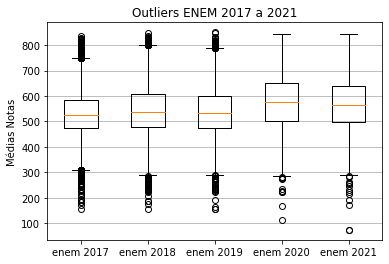

In [259]:
#Elaboração do Boxplot das edições de 2017 a 2021. Temos a finalidade de ver se é necessário a exclusão ou não dos
#outliers, e como podemos perceber, não é necessário excluir, pois além de perdermos muitos dados caso excluamos, o que 
#nos importa no estudo é a quantidade de alunos com intenção de prestar vestibular, e no caso como são muitos itens 
#"discrepantes", a média geral não será muito afetada por esses valores.
media_enem_2017a2021= [lista_media_enem_2017, lista_media_enem_2018, lista_media_enem_2019,\
                       lista_media_enem_2020, lista_media_enem_2021]
plt.boxplot(media_enem_2017a2021, labels=["enem 2017", "enem 2018", "enem 2019", "enem 2020", "enem 2021"])
plt.title("Outliers ENEM 2017 a 2021")
plt.ylabel("Médias Notas")
plt.grid(axis= "y")
plt.show();

## 12- Analises e comparações das tabelas em forma de gráficos

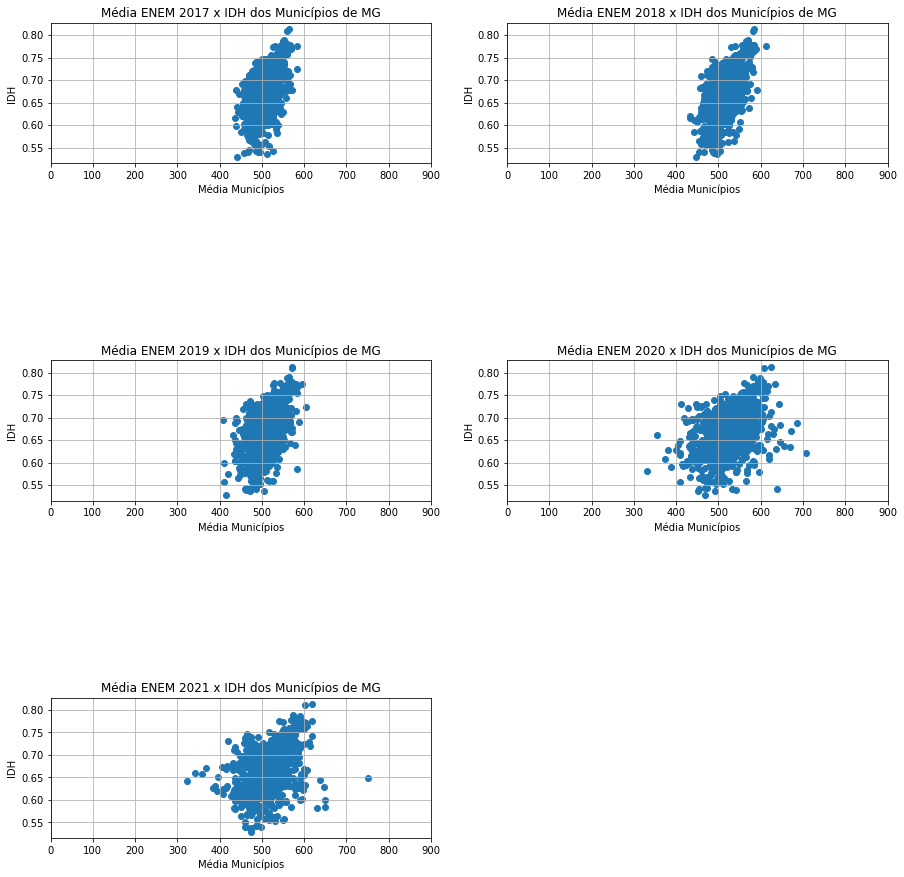

In [260]:
gridsize= (5,2)
grafico_scatter_enem_linha= plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (2, 0))
ax4 = plt.subplot2grid(gridsize, (2, 1))
ax5 = plt.subplot2grid(gridsize, (4, 0))

ax1.scatter(tabela_enem_idhm_2017.NOTA_2017, tabela_enem_idhm_2017.IDHM_2017)
ax1.set_title('Média ENEM 2017 x IDH dos Municípios de MG')
ax1.set_xlabel('Média Municípios')
ax1.set_ylabel('IDH')
ax1.set_xticks(np.arange(0, 1000, 100))
ax1.grid()

ax2.scatter(tabela_enem_idhm_2018.NOTA_2018, tabela_enem_idhm_2018.IDHM_2018)
ax2.set_title('Média ENEM 2018 x IDH dos Municípios de MG')
ax2.set_xlabel('Média Municípios')
ax2.set_ylabel('IDH')
ax2.set_xticks(np.arange(0, 1000, 100))
ax2.grid()

ax3.scatter(tabela_enem_idhm_2019.NOTA_2019, tabela_enem_idhm_2019.IDHM_2019)
ax3.set_title('Média ENEM 2019 x IDH dos Municípios de MG')
ax3.set_xlabel('Média Municípios')
ax3.set_ylabel('IDH')
ax3.set_xticks(np.arange(0, 1000, 100))
ax3.grid()

ax4.scatter(tabela_enem_idhm_2020.NOTA_2020, tabela_enem_idhm_2020.IDHM_2020)
ax4.set_title('Média ENEM 2020 x IDH dos Municípios de MG')
ax4.set_xlabel('Média Municípios')
ax4.set_ylabel('IDH')
ax4.set_xticks(np.arange(0, 1000, 100))
ax4.grid()

ax5.scatter(tabela_enem_idhm_2021.NOTA_2021, tabela_enem_idhm_2021.IDHM_2021)
ax5.set_title('Média ENEM 2021 x IDH dos Municípios de MG')
ax5.set_xlabel('Média Municípios')
ax5.set_ylabel('IDH')
ax5.set_xticks(np.arange(0, 1000, 100))
ax5.grid()

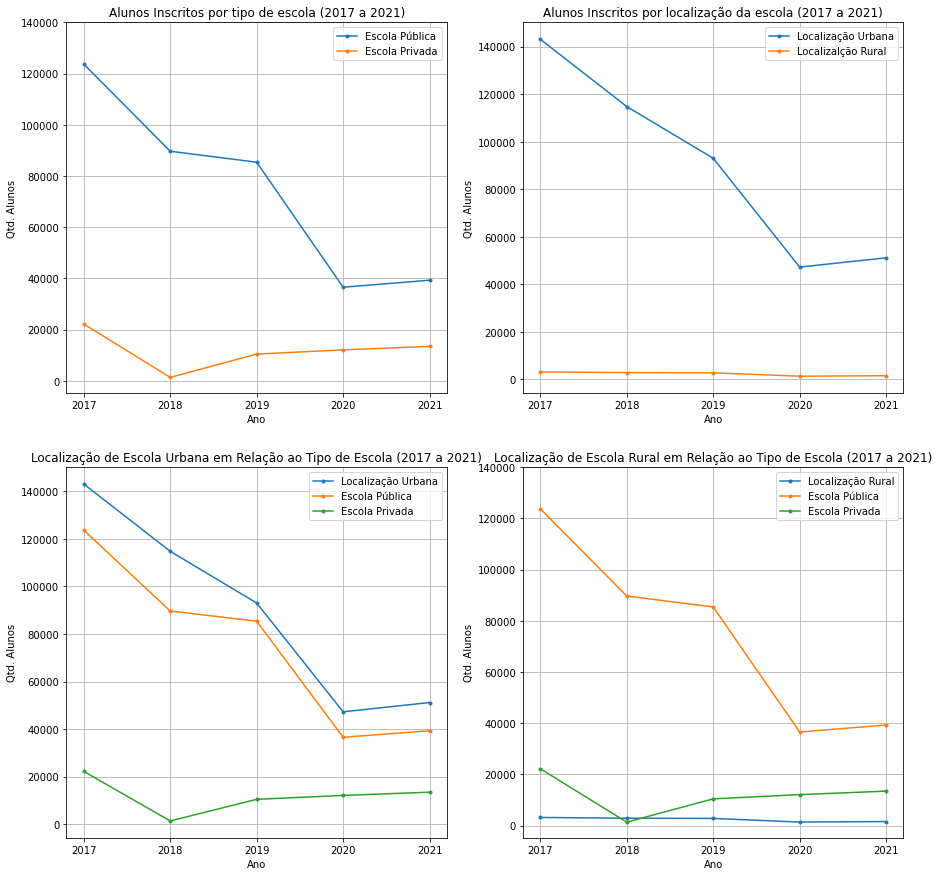

In [261]:
gridsize= (2,2)
grafico_media_enem_linha= plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0))
ax4 = plt.subplot2grid(gridsize, (1, 1))

ax1.set_title("Alunos Inscritos por tipo de escola (2017 a 2021)")
ax1.plot(tipo_esc_2017a2021.pública, label = "Escola Pública", marker='.')
ax1.plot(tipo_esc_2017a2021.privada, label = "Escola Privada", marker='.')
ax1.set_xlabel("Ano")
ax1.set_ylabel("Qtd. Alunos")
ax1.set_yticks(np.arange(0, 160000, 20000))
ax1.grid()
ax1.legend()

ax2.set_title("Alunos Inscritos por localização da escola (2017 a 2021)")
ax2.plot(loc_esc_2017a2021.urbana, label = "Localização Urbana", marker='.')
ax2.plot(loc_esc_2017a2021.rural, label = "Localizalção Rural", marker='.')
ax2.set_xlabel("Ano")
ax2.set_ylabel("Qtd. Alunos")
ax2.set_yticks(np.arange(0, 160000, 20000))
ax2.grid()
ax2.legend()

ax3.set_title("Localização de Escola Urbana em Relação ao Tipo de Escola (2017 a 2021)")
ax3.plot(loc_esc_2017a2021.urbana, label = "Localização Urbana", marker='.')
ax3.plot(tipo_esc_2017a2021.pública, label = "Escola Pública", marker='.')
ax3.plot(tipo_esc_2017a2021.privada, label = "Escola Privada", marker='.')
ax3.set_xlabel("Ano")
ax3.set_ylabel("Qtd. Alunos")
ax3.set_yticks(np.arange(0, 160000, 20000))
ax3.grid()
ax3.legend()

ax4.set_title("Localização de Escola Rural em Relação ao Tipo de Escola (2017 a 2021)")
ax4.plot(loc_esc_2017a2021.rural, label = "Localização Rural", marker='.')
ax4.plot(tipo_esc_2017a2021.pública, label = "Escola Pública", marker='.')
ax4.plot(tipo_esc_2017a2021.privada, label = "Escola Privada", marker='.')
ax4.set_xlabel("Ano")
ax4.set_ylabel("Qtd. Alunos")
ax4.set_yticks(np.arange(0, 160000, 20000))
ax4.grid()
ax4.legend();

## 13- Implementação dos Algoritmos
## 13.1- importação das bibliotecas

In [262]:
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
%matplotlib

Using matplotlib backend: Qt5Agg


## 13.2- Criação da Tabela 'Notas x IDH' para aplicação dos Algoritmos

In [263]:
#Fazendo a copia profunda para criar o array para ser o eixo X do algoritmo
tabela_final_atrib= pickle.loads(pickle.dumps(tabela_final_lat_long_sem_str))
tabela_final_atrib.head()

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,ibge,latitude,longitude
0,581.829,611.770,595.555,634.610,619.014,0.775,317130,-20.7559,-42.8742
1,581.817,578.738,603.464,608.480,599.572,0.724,312600,-19.8880,-44.4318
2,570.789,590.010,571.449,552.567,541.433,0.677,311970,-21.0277,-44.2206
3,568.266,589.748,585.393,616.613,601.067,0.770,316870,-19.5811,-42.6471
4,566.911,584.153,571.980,602.125,591.839,0.778,313670,-21.7595,-43.3398


In [264]:
tabela_final_atrib.shape

(810, 9)

In [265]:
tabela_final_atrib[tabela_final_atrib.columns[0:6]]

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH
0,581.829,611.770,595.555,634.610,619.014,0.775
1,581.817,578.738,603.464,608.480,599.572,0.724
2,570.789,590.010,571.449,552.567,541.433,0.677
3,568.266,589.748,585.393,616.613,601.067,0.770
4,566.911,584.153,571.980,602.125,591.839,0.778
...,...,...,...,...,...,...
805,446.678,483.480,489.748,492.400,441.790,0.669
806,440.636,459.952,472.865,479.116,486.404,0.640
807,440.049,446.964,415.514,468.421,474.492,0.529
808,439.248,476.509,463.863,414.340,437.340,0.597


In [266]:
#confirmando o tipo de cada coluna no dataframe
tabela_final_atrib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nota_2017  810 non-null    float64
 1   Nota_2018  810 non-null    float64
 2   Nota_2019  810 non-null    float64
 3   Nota_2020  810 non-null    float64
 4   Nota_2021  810 non-null    float64
 5   IDH        810 non-null    float64
 6   ibge       810 non-null    int64  
 7   latitude   810 non-null    float64
 8   longitude  810 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 63.3 KB


## 13.3- Definição do Algoritmo PCA

In [267]:
#Definindo o PCA, algoritmo de redução de dimensionalidade. Diminuindo de 6 componentes para 2.
pca= PCA(n_components= 2). fit_transform(tabela_final_atrib[tabela_final_atrib.columns[0:6]])
pca

array([[ 210.36412918,   10.55555075],
       [ 175.75032499,   15.47083914],
       [  98.54888562,   17.5746837 ],
       ...,
       [-131.7232192 ,  -10.96281012],
       [-157.7646672 ,   16.89292954],
       [-151.08374066,    9.54285924]])

## 13.4- Calculando a Curva do Cotovelo

In [268]:
#Calculando a quantidade de clusters através da curva do cotovelo
wcss= []
for i in range(1, 15):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

## 13.5- Verificando a melhor quantidade de cluster para K-Means utilizando Silhouette Score


In [269]:
#Criando modelo com 3 clusters
modelo_v1= KMeans(n_clusters= 3)
modelo_v1.fit(pca)

KMeans(n_clusters=3)

In [270]:
#Silhouette Score. Salvando as Labels (testanndo para C=3)
labels= modelo_v1.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.36934778297525367

In [271]:
#Criando modelo com 4 clusters
modelo_v2= KMeans(n_clusters= 4)
modelo_v2.fit(pca)

KMeans(n_clusters=4)

In [272]:
#Silhouette Score. Salvando as Labels (testanndo para C=4)
labels= modelo_v2.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.33644856336784296

In [273]:
#Criando modelo com 5 clusters
modelo_v3= KMeans(n_clusters= 5)
modelo_v3.fit(pca)

KMeans(n_clusters=5)

In [274]:
#Silhouette Score. Salvando as Labels (testanndo para C=5)
labels= modelo_v3.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.3371594206096249

In [275]:
#Criando modelo com 6 clusters
modelo_v4= KMeans(n_clusters= 6)
modelo_v4.fit(pca)

KMeans(n_clusters=6)

In [276]:
#Silhouette Score. Salvando as Labels (testanndo para C=6)
labels= modelo_v4.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.3661657461106327

In [277]:
#Criando uma lista com o nome das colunas
nome_colunas= ['Nota_2017','Nota_2018','Nota_2019','Nota_2020','Nota_2021','IDH', 'ibge']

In [278]:
#Incluindo o número do cluster na base de dados
cluster_map= pd.DataFrame(tabela_final_atrib, columns= nome_colunas)
cluster_map['cluster']= modelo_v1.labels_

In [279]:
#Quantidade de município por cluster
cluster_map.groupby('cluster')['IDH'].count()

cluster
0    354
1    253
2    203
Name: IDH, dtype: int64

In [280]:
cluster_map

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,ibge,cluster
0,581.829,611.770,595.555,634.610,619.014,0.775,317130,2
1,581.817,578.738,603.464,608.480,599.572,0.724,312600,2
2,570.789,590.010,571.449,552.567,541.433,0.677,311970,2
3,568.266,589.748,585.393,616.613,601.067,0.770,316870,2
4,566.911,584.153,571.980,602.125,591.839,0.778,313670,2
...,...,...,...,...,...,...,...,...
805,446.678,483.480,489.748,492.400,441.790,0.669,317210,1
806,440.636,459.952,472.865,479.116,486.404,0.640,316420,1
807,440.049,446.964,415.514,468.421,474.492,0.529,316245,1
808,439.248,476.509,463.863,414.340,437.340,0.597,314370,1


In [281]:
#selecionando os municípios que ficaram no cluster '0'
boolarray= cluster_map['cluster'] == 0
cluster_map[boolarray]

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,ibge,cluster
27,555.105,541.567,508.644,514.593,435.980,0.717,312520,0
45,549.319,537.309,512.999,548.803,515.906,0.629,312330,0
53,546.424,532.454,535.071,530.077,522.887,0.724,316220,0
59,544.559,537.453,521.911,514.004,519.933,0.650,315490,0
65,542.729,523.809,529.283,508.250,555.964,0.668,311720,0
...,...,...,...,...,...,...,...,...
790,460.738,487.446,513.900,514.252,532.853,0.697,311690,0
792,459.911,509.642,484.789,539.300,477.233,0.667,315870,0
796,457.241,483.076,515.411,541.070,563.173,0.664,315500,0
797,457.002,480.142,459.446,584.465,489.078,0.602,310850,0


In [282]:
#selecionando os municípios que ficaram no cluster '0'
cluster_map_mun= pickle.loads(pickle.dumps(cluster_map))
cluster_map_mun= pd.merge(cluster_map, lat_long, on= 'ibge')
cluster_map_mun.drop(columns=['latitude', 'longitude', 'ibge'], axis= 1, inplace= True)
cluster_map_mun

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,cluster,Município
0,581.829,611.770,595.555,634.610,619.014,0.775,2,Viçosa
1,581.817,578.738,603.464,608.480,599.572,0.724,2,Florestal
2,570.789,590.010,571.449,552.567,541.433,0.677,2,Coronel Xavier Chaves
3,568.266,589.748,585.393,616.613,601.067,0.770,2,Timóteo
4,566.911,584.153,571.980,602.125,591.839,0.778,2,Juiz de Fora
...,...,...,...,...,...,...,...,...
805,446.678,483.480,489.748,492.400,441.790,0.669,1,Volta Grande
806,440.636,459.952,472.865,479.116,486.404,0.640,1,São Romão
807,440.049,446.964,415.514,468.421,474.492,0.529,1,São João das Missões
808,439.248,476.509,463.863,414.340,437.340,0.597,1,Morro do Pilar


In [283]:
#ordenando por município de forma descendente
cluster_map_mun.sort_values(by= "IDH", ascending= False). head(10)

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,cluster,Município
8,564.355,584.742,570.278,623.782,617.324,0.813,2,Nova Lima
16,559.774,582.245,572.083,607.058,601.853,0.810,2,Belo Horizonte
33,553.143,568.973,562.940,581.396,572.528,0.789,2,Uberlândia
40,550.447,566.033,558.929,598.671,588.948,0.787,2,Itajubá
22,556.891,570.843,567.339,592.870,579.584,0.782,2,Lavras
25,555.977,570.331,563.783,597.277,586.102,0.779,2,Poços de Caldas
11,562.636,579.201,563.496,606.133,588.929,0.778,2,Varginha
4,566.911,584.153,571.980,602.125,591.839,0.778,2,Juiz de Fora
56,545.646,554.854,542.002,595.642,568.749,0.777,2,Lagoa Santa
144,531.849,538.150,529.076,560.639,540.148,0.776,2,Itaú de Minas


In [284]:
#Listando os Municípios que estão no cluster 0, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 0
cluster_zero= cluster_map_mun[boolarray]
cluster_zero['Município'].to_numpy()

array(['Fama', 'Dores do Turvo', 'São João Batista do Glória',
       'Rio Casca', 'Conceição das Pedras', 'Itueta', 'Goianá',
       'Guidoval', 'Rio Paranaíba', 'Itamonte', 'Cristiano Otoni',
       'Catas Altas da Noruega', 'Conceição da Barra de Minas',
       'Desterro do Melo', 'São Tiago', 'Campo Florido', 'Córrego Fundo',
       'Estiva', 'Lima Duarte', 'Juruaia', 'Cedro do Abaeté', 'Alvarenga',
       'Antônio Prado de Minas', 'Monte Belo', 'Conceição dos Ouros',
       'Dores de Campos', 'Ritápolis', 'Conceição da Aparecida',
       'Carvalhópolis', 'São Sebastião da Vargem Alegre', 'Campestre',
       'União de Minas', 'Alto Jequitibá', 'Abadia dos Dourados',
       'Natércia', 'Desterro de Entre Rios', 'Nova Resende', 'Piraúba',
       'Cachoeira de Minas', 'Rio Piracicaba', 'Casa Grande', 'Itutinga',
       'Borda da Mata', 'Turmalina', 'Campos Gerais',
       'Santa Rita de Minas', 'Coromandel', 'Piranguinho', 'Paineiras',
       'Pedra do Anta', 'Marmelópolis', 'São José

In [285]:
#Listando os Municípios que estão no cluster 1, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 1
cluster_um= cluster_map_mun[boolarray]
cluster_um['Município'].to_numpy()

array(['Jaguaraçu', 'Alto Caparaó', 'Rio Preto', 'Seritinga',
       'Sapucaí-Mirim', 'São Sebastião do Oeste', 'José Raydan',
       'Frei Lagonegro', 'Santa Bárbara do Monte Verde', 'Carmésia',
       'São Gonçalo do Rio Preto', 'Vermelho Novo', 'Pocrane',
       'Santo Antônio do Grama', 'Guarda-Mor', 'Córrego Novo',
       'Indianópolis', 'Laranjal', 'Cristina', 'Carrancas',
       'Capitão Andrade', 'Jequitaí', 'Brás Pires', 'Lassance',
       'Serra do Salitre', 'Madre de Deus de Minas', 'Araponga',
       'Veríssimo', 'Recreio', 'Montalvânia', 'Santa Rita de Jacutinga',
       'Nova Módica', 'Brasilândia de Minas',
       'São Sebastião do Rio Verde', 'Monte Alegre de Minas', 'Confins',
       'Pequeri', 'Datas', 'Ibituruna', 'Virgínia', 'Felixlândia',
       'Perdizes', 'Mathias Lobato', 'Cana Verde', 'Barão de Monte Alto',
       'Belmiro Braga', 'Quartel Geral', 'Piedade do Rio Grande',
       'Conceição das Alagoas', 'São Pedro da União', 'São João da Lagoa',
       'São Gon

In [286]:
#Listando os Municípios que estão no cluster 2, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 2
cluster_dois= cluster_map_mun[boolarray]
cluster_dois['Município'].to_numpy()

array(['Viçosa', 'Florestal', 'Coronel Xavier Chaves', 'Timóteo',
       'Juiz de Fora', 'Tapira', 'Inconfidentes', 'Nova Lima',
       'Pouso Alegre', 'Barbacena', 'Varginha', 'Japaraíba',
       'São João Nepomuceno', 'Resende Costa', 'Rio Pomba',
       'Belo Horizonte', 'Patos de Minas', 'Itaúna', 'São João del Rei',
       'Pedralva', 'Lavras', 'Formiga', 'Abaeté', 'Poços de Caldas',
       'Ipatinga', 'Maria da Fé', 'Lagoa Dourada', 'Ouro Branco', 'Araxá',
       'Divinópolis', 'Uberlândia', 'Muzambinho', 'Ubá',
       'Bom Jesus da Penha', 'Barroso', 'São Lourenço', 'Itamogi',
       'Itajubá', 'Itanhandu', 'João Monlevade',
       'São Sebastião do Paraíso', 'Senador José Bento', 'Luminárias',
       'Santa Rita do Sapucaí', 'Lagoa Formosa', 'Piumhi', 'Leopoldina',
       'Bom Despacho', 'Guaxupé', 'Teixeiras', 'Congonhas', 'Lagoa Santa',
       'Sete Lagoas', 'Ouro Preto', 'Ervália', 'Uberaba', 'Machado',
       'Cataguases', 'Oliveira Fortes', 'Campanha',
       'São João Eva

In [287]:
#No cluster 2, ficaram os municípios com o maior IDH, BH (pegar mais 9); no cluster 1, os com IDH médio; e no cluster 0, os com
#menor índice de IDH.

## 13.6- Analisando os gráficos gerados pela clusterização K-Means

In [288]:
plt.figure(figsize= (7.5, 7.5))
plt.scatter(pca[:, 0], pca[:, 1], c=modelo_v1.labels_)
plt.xlabel('Notas')
plt.ylabel('IDH')
plt.title("Clusterização KMeans com PCA - 2017 a 2021")
plt.box(False)
plt.show()

In [289]:
tabela_final_atrib.plot.scatter(y= 'latitude', x= 'longitude',\
                                c=modelo_v1.labels_, cmap= 'RdYlGn',title= 'KMeans Redimensionado - 2017 a 2021')

<AxesSubplot:title={'center':'KMeans Redimensionado - 2017 a 2021'}, xlabel='longitude', ylabel='latitude'>

In [290]:
tabela_final_atrib.plot.scatter(y= 'IDH', x= 'Nota_2021',\
                                c=modelo_v1.labels_, cmap= 'RdYlGn',\
                                title= 'KMeans Redimensionado IDH x Nota - 2017 a 2021', xlabel= 'Notas', ylabel='IDH')

<AxesSubplot:title={'center':'KMeans Redimensionado IDH x Nota - 2017 a 2021'}, xlabel='Notas', ylabel='IDH'>

## 13.6.1- Posicionando a clusterização sobre o Mapa de MG

In [291]:
#Instalando bibliotecas
!pip install geopandas
!pip install matplotlib
!pip install descartes
!pip install shapely
!pip install openpyxl
!pip install pandas
!pip install geopandas geobr

In [292]:
#Importando bibliotecas
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

PROJ: proj_create_from_database: SQLite error on SELECT type FROM crs_view WHERE auth_name = ? AND code = ?: no such table: crs_view


In [293]:
#conferindo a versão do geopandas
!conda list geopandas

# packages in environment at C:\Users\Arthur\anaconda3:
#
# Name                    Version                   Build  Channel
geopandas                 0.7.0                    pypi_0    pypi


In [294]:
#conferindo a versão do shapely
!conda list shapely

# packages in environment at C:\Users\Arthur\anaconda3:
#
# Name                    Version                   Build  Channel
shapely                   1.8.4            py39h9064783_0  


In [295]:
type(tabela_final_atrib)

pandas.core.frame.DataFrame

In [296]:
#Criando coluna com os dados geométricos
tabela_final_atrib ['geometria'] = None

In [297]:
#Criando GeoDataFrame
gdf_tabela_final_atrib= gpd.GeoDataFrame(tabela_final_atrib, geometry= 'geometria')
type(gdf_tabela_final_atrib)

geopandas.geodataframe.GeoDataFrame

In [298]:
#Iterando sobre a tabela com os dados geométricos
for index,  row in tabela_final_atrib.iterrows():
    tabela_final_atrib.loc[index, 'geometria'] = Point(row.longitude, row.latitude)

In [299]:
gdf_tabela_final_atrib.head()

,Nota_2017,Nota_2018,Nota_2019,Nota_2020,Nota_2021,IDH,ibge,latitude,longitude,geometria
0,581.829,611.770,595.555,634.610,619.014,0.775,317130,-20.7559,-42.8742,POINT (-42.87420 -20.75590)
1,581.817,578.738,603.464,608.480,599.572,0.724,312600,-19.8880,-44.4318,POINT (-44.43180 -19.88800)
2,570.789,590.010,571.449,552.567,541.433,0.677,311970,-21.0277,-44.2206,POINT (-44.22060 -21.02770)
3,568.266,589.748,585.393,616.613,601.067,0.770,316870,-19.5811,-42.6471,POINT (-42.64710 -19.58110)
4,566.911,584.153,571.980,602.125,591.839,0.778,313670,-21.7595,-43.3398,POINT (-43.33980 -21.75950)


In [300]:
gdf_tabela_final_atrib.plot()

<AxesSubplot:>

In [301]:
#Criando variável com as coordenadas geográficas de MG
muni= geobr.read_municipality(code_muni= 'MG', year= 2020)

In [302]:
type(muni)

geopandas.geodataframe.GeoDataFrame

In [303]:
muni.plot()

<AxesSubplot:>

In [304]:
print('município:', muni.crs)
print('Tabela_final:', gdf_tabela_final_atrib.crs)

município: None
Tabela_final: None


In [305]:
#igualando os crs´s
muni.crs = gdf_tabela_final_atrib.crs

In [306]:
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,3100104.0,Abadia Dos Dourados,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-47.43543 -18.16778, -47.42976..."
1,3100203.0,Abaeté,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-45.16777 -18.89073, -45.14029..."
2,3100302.0,Abre Campo,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-42.38220 -20.12176, -42.36801..."
3,3100401.0,Acaiaca,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-43.13156 -20.34249, -43.13081..."
4,3100500.0,Açucena,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-42.37085 -18.92507, -42.36208..."


In [307]:
#Plontando o gráfico sobre a base do mapa de Minas Gerais
base =  muni.plot(figsize=(10,10), edgecolor= 'black', linewidth= 0.5, color= '#CCCCCC')

mapa_exemplo = gdf_tabela_final_atrib.plot(ax=base, cmap= 'RdYlGn')
mapa_exemplo.axis('off')

(-51.605544457, -39.29736624499999, -23.357226357549994, -13.798862211449995)

## 13.7- Implementação do DBScan

In [308]:
from sklearn.cluster import DBSCAN 

In [309]:
#com raio igual a 10 e 10 amostras 
dbscan_pca= DBSCAN(eps= 10, min_samples= 10)
dbscan_pca.fit(pca)

DBSCAN(eps=10, min_samples=10)

In [310]:
rotulos= dbscan_pca.labels_
rotulos

array([-1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,
        0, -1, -1,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  1, -1,  0,  0, -1,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  1,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0, -1,  0,  0,
        0,  0,  1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0

In [311]:
plt.figure(figsize= (7.5, 7.5))
plt.scatter(pca[:, 0], pca[:, 1], c=rotulos)
plt.xlabel('Notas')
plt.ylabel('IDH')
plt.title("Clusterização DBScan com PCA")
plt.box(False)
plt.show()

In [312]:
#Baseado na latitude e Longitude
tabela_final_atrib.plot.scatter(y= 'latitude', x= 'longitude', c=rotulos, cmap= 'RdYlGn',title= 'DBScan Redimensionado')

<AxesSubplot:title={'center':'DBScan Redimensionado'}, xlabel='longitude', ylabel='latitude'>

In [313]:
#baseado na tabela IDH e Notas (criar um array para colocar no lugar das notas)
tabela_final_atrib.plot.scatter(y= 'IDH', x= 'Nota_2021', c=rotulos, cmap= 'RdYlGn',\
                                title= 'DBScan Redimensionado IDH x Nota', xlabel= 'Notas', ylabel='IDH')

<AxesSubplot:title={'center':'DBScan Redimensionado IDH x Nota'}, xlabel='Notas', ylabel='IDH'>

## 14- Análise de 2017 a 2019

## 14.1- Ajustando a Tabela

In [314]:
#Fazendo a copia profunda para criar o array para ser o eixo X do algoritmo
tab_fin_2017a2019= pickle.loads(pickle.dumps(tabela_final_lat_long_sem_str))
tab_fin_2017a2019.drop(columns=['Nota_2020','Nota_2021'], axis= 1, inplace= True)
tab_fin_2017a2019.head()

,Nota_2017,Nota_2018,Nota_2019,IDH,ibge,latitude,longitude
0,581.829,611.770,595.555,0.775,317130,-20.7559,-42.8742
1,581.817,578.738,603.464,0.724,312600,-19.8880,-44.4318
2,570.789,590.010,571.449,0.677,311970,-21.0277,-44.2206
3,568.266,589.748,585.393,0.770,316870,-19.5811,-42.6471
4,566.911,584.153,571.980,0.778,313670,-21.7595,-43.3398


In [315]:
tab_fin_2017a2019.shape

(810, 7)

In [316]:
tab_fin_2017a2019[tab_fin_2017a2019.columns[0:4]]

,Nota_2017,Nota_2018,Nota_2019,IDH
0,581.829,611.770,595.555,0.775
1,581.817,578.738,603.464,0.724
2,570.789,590.010,571.449,0.677
3,568.266,589.748,585.393,0.770
4,566.911,584.153,571.980,0.778
...,...,...,...,...
805,446.678,483.480,489.748,0.669
806,440.636,459.952,472.865,0.640
807,440.049,446.964,415.514,0.529
808,439.248,476.509,463.863,0.597


In [317]:
tab_fin_2017a2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nota_2017  810 non-null    float64
 1   Nota_2018  810 non-null    float64
 2   Nota_2019  810 non-null    float64
 3   IDH        810 non-null    float64
 4   ibge       810 non-null    int64  
 5   latitude   810 non-null    float64
 6   longitude  810 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 50.6 KB


## 14.2- Cálculo do PCA 2017 a 2019

In [318]:
pca= PCA(n_components= 2). fit_transform(tab_fin_2017a2019[tab_fin_2017a2019.columns[0:4]])
pca

array([[ 149.76507387,   13.69604726],
       [ 135.85794777,  -11.46260508],
       [ 116.13390905,   15.87577597],
       ...,
       [-132.48756861,   10.53545598],
       [ -84.65561145,   -9.0306436 ],
       [-125.56134294,  -20.37163462]])

## 14.3- Calculando a Curva do Cotovelo

In [319]:
wcss= []
for i in range(1, 15):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

## 14.4- Verificando a melhor quantidade de cluster para K-Means utilizando Silhouette Score

In [320]:
modelo_v1= KMeans(n_clusters= 3)
modelo_v1.fit(pca)

KMeans(n_clusters=3)

In [321]:
labels= modelo_v1.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.4024423185624459

In [322]:
modelo_v2= KMeans(n_clusters= 4)
modelo_v2.fit(pca)

KMeans(n_clusters=4)

In [323]:
labels= modelo_v2.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.36969581188673245

In [324]:
modelo_v3= KMeans(n_clusters= 5)
modelo_v3.fit(pca)

KMeans(n_clusters=5)

In [325]:
labels= modelo_v3.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.3310904850155393

In [326]:
modelo_v4= KMeans(n_clusters= 6)
modelo_v4.fit(pca)

KMeans(n_clusters=6)

In [327]:
labels= modelo_v4.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.32841749252155866

In [328]:
modelo_v5= KMeans(n_clusters= 7)
modelo_v5.fit(pca)

KMeans(n_clusters=7)

In [329]:
labels= modelo_v5.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.332199349038872

In [330]:
#Criando uma lista com o nome das colunas
nome_colunas= ['Nota_2017','Nota_2018','Nota_2019','IDH', 'ibge']

In [331]:
#Incluindo o número do cluster na base de dados
cluster_map= pd.DataFrame(tab_fin_2017a2019, columns= nome_colunas)
cluster_map['cluster']= modelo_v1.labels_

In [332]:
#Quantidade de município por cluster
cluster_map.groupby('cluster')['IDH'].count()

cluster
0    200
1    252
2    358
Name: IDH, dtype: int64

In [333]:
cluster_map

,Nota_2017,Nota_2018,Nota_2019,IDH,ibge,cluster
0,581.829,611.770,595.555,0.775,317130,0
1,581.817,578.738,603.464,0.724,312600,0
2,570.789,590.010,571.449,0.677,311970,0
3,568.266,589.748,585.393,0.770,316870,0
4,566.911,584.153,571.980,0.778,313670,0
...,...,...,...,...,...,...
805,446.678,483.480,489.748,0.669,317210,1
806,440.636,459.952,472.865,0.640,316420,1
807,440.049,446.964,415.514,0.529,316245,1
808,439.248,476.509,463.863,0.597,314370,1


In [334]:
#selecionando os municípios que ficaram no cluster '0'
boolarray= cluster_map['cluster'] == 0
cluster_map[boolarray]

,Nota_2017,Nota_2018,Nota_2019,IDH,ibge,cluster
0,581.829,611.770,595.555,0.775,317130,0
1,581.817,578.738,603.464,0.724,312600,0
2,570.789,590.010,571.449,0.677,311970,0
3,568.266,589.748,585.393,0.770,316870,0
4,566.911,584.153,571.980,0.778,313670,0
...,...,...,...,...,...,...
368,511.108,534.381,556.588,0.689,315200,0
377,510.558,540.320,541.789,0.632,315310,0
424,505.623,530.286,566.060,0.688,313260,0
434,504.763,546.067,535.162,0.646,310180,0


In [335]:
#selecionando os municípios que ficaram no cluster '0'
cluster_map_mun= pickle.loads(pickle.dumps(cluster_map))
cluster_map_mun= pd.merge(cluster_map, lat_long, on= 'ibge')
cluster_map_mun.drop(columns=['latitude', 'longitude', 'ibge'], axis= 1, inplace= True)
cluster_map_mun

,Nota_2017,Nota_2018,Nota_2019,IDH,cluster,Município
0,581.829,611.770,595.555,0.775,0,Viçosa
1,581.817,578.738,603.464,0.724,0,Florestal
2,570.789,590.010,571.449,0.677,0,Coronel Xavier Chaves
3,568.266,589.748,585.393,0.770,0,Timóteo
4,566.911,584.153,571.980,0.778,0,Juiz de Fora
...,...,...,...,...,...,...
805,446.678,483.480,489.748,0.669,1,Volta Grande
806,440.636,459.952,472.865,0.640,1,São Romão
807,440.049,446.964,415.514,0.529,1,São João das Missões
808,439.248,476.509,463.863,0.597,1,Morro do Pilar


In [336]:
#Listando os Municípios que estão no cluster 0, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 0
cluster_zero= cluster_map_mun[boolarray]
cluster_zero['Município'].to_numpy()

array(['Viçosa', 'Florestal', 'Coronel Xavier Chaves', 'Timóteo',
       'Juiz de Fora', 'Tapira', 'Inconfidentes', 'Nova Lima',
       'Pouso Alegre', 'Barbacena', 'Varginha', 'Japaraíba',
       'São João Nepomuceno', 'Resende Costa', 'Rio Pomba',
       'Belo Horizonte', 'Patos de Minas', 'Itaúna', 'São João del Rei',
       'Pedralva', 'Alto Caparaó', 'Lavras', 'Formiga', 'Abaeté',
       'Poços de Caldas', 'Ipatinga', 'Fama', 'Maria da Fé',
       'Lagoa Dourada', 'Ouro Branco', 'Araxá', 'Divinópolis',
       'Uberlândia', 'Muzambinho', 'Ubá', 'Bom Jesus da Penha', 'Barroso',
       'São Lourenço', 'Itajubá', 'Itanhandu', 'João Monlevade',
       'São Sebastião do Paraíso', 'Dores do Turvo', 'Luminárias',
       'Santa Rita do Sapucaí', 'Lagoa Formosa', 'Piumhi', 'Leopoldina',
       'Bom Despacho', 'Guaxupé', 'São João Batista do Glória',
       'Teixeiras', 'Congonhas', 'Lagoa Santa', 'Sete Lagoas',
       'Ouro Preto', 'Rio Casca', 'Ervália', 'Uberaba', 'Machado',
       'Catag

In [337]:
#Listando os Municípios que estão no cluster 1, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 1
cluster_um= cluster_map_mun[boolarray]
cluster_um['Município'].to_numpy()

array(['José Raydan', 'Joanésia', 'São Gonçalo do Rio Preto', 'Ibertioga',
       'Laranjal', 'Dores de Guanhães', 'Lassance',
       'Madre de Deus de Minas', 'Veríssimo', 'Montalvânia',
       'Nova Módica', 'Brasilândia de Minas', 'Pequeri', 'Mathias Lobato',
       'Cana Verde', 'Barão de Monte Alto', 'Ibiá', 'Vieiras',
       'Frei Inocêncio', 'Quartel Geral', 'Caparaó', 'Acaiaca',
       'São Gonçalo do Pará', 'Tabuleiro', 'Naque', 'Iraí de Minas',
       'Pedro Teixeira', 'Bela Vista de Minas', 'Divino das Laranjeiras',
       'Moeda', 'Serra dos Aimorés', 'Ipaba', 'Arceburgo', 'Peçanha',
       'Novo Oriente de Minas', 'Fortaleza de Minas', 'Esmeraldas',
       'Cambuquira', 'Gonzaga', 'Estrela do Sul',
       'Senador Modestino Gonçalves', 'Angelândia', 'Argirita',
       'Ibiracatu', 'Catuji', 'Careaçu', 'Coluna', 'Luislândia',
       'Aimorés', 'Carlos Chagas', 'Santa Juliana', 'Varzelândia',
       'Dionísio', 'Grupiara', 'Senador Amaral', 'Chapada do Norte',
       'Presid

In [338]:
#Listando os Municípios que estão no cluster 2, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 2
cluster_dois= cluster_map_mun[boolarray]
cluster_dois['Município'].to_numpy()

array(['Jaguaraçu', 'Itamogi', 'Senador José Bento', 'Itueta', 'Goianá',
       'Guidoval', 'Cristiano Otoni', 'Catas Altas da Noruega',
       'Desterro do Melo', 'São Tiago', 'Campo Florido', 'Aricanduva',
       'Córrego Fundo', 'Lima Duarte', 'Lamim', 'Alvarenga',
       'Antônio Prado de Minas', 'Monte Belo', 'Liberdade', 'Rio Preto',
       'Conceição da Aparecida', 'Carvalhópolis',
       'São Sebastião da Vargem Alegre', 'Seritinga', 'União de Minas',
       'Biquinhas', 'Alto Jequitibá', 'Abadia dos Dourados', 'Natércia',
       'Desterro de Entre Rios', 'Nova Resende', 'Sapucaí-Mirim',
       'Piraúba', 'Cachoeira de Minas', 'Rio Piracicaba',
       'São Sebastião do Oeste', 'Casa Grande', 'Itutinga',
       'Borda da Mata', 'Turmalina', 'Campos Gerais', 'Frei Lagonegro',
       'Santa Rita de Minas', 'Coromandel', 'Marmelópolis',
       'São José do Alegre', 'Miradouro', 'Jaboticatubas', 'Araguari',
       'Santos Dumont', 'Rio Espera', 'Cruzília', 'Funilândia',
       'Aiur

## 13.5- Analisando os gráficos gerados pela clusterização K-Means

In [339]:
plt.figure(figsize= (7.5, 7.5))
plt.scatter(pca[:, 0], pca[:, 1], c=modelo_v1.labels_)
plt.xlabel('Notas')
plt.ylabel('IDH')
plt.title("Clusterização KMeans com PCA - 2017 a 2019")
plt.box(False)
plt.show()

In [340]:
tab_fin_2017a2019.plot.scatter(y= 'latitude', x= 'longitude',\
                                c=modelo_v1.labels_, cmap= 'RdYlGn',title= 'KMeans Redimensionado - 2017 a 2019')

<AxesSubplot:title={'center':'KMeans Redimensionado - 2017 a 2019'}, xlabel='longitude', ylabel='latitude'>

In [341]:
tab_fin_2017a2019.plot.scatter(y= 'IDH', x= 'Nota_2019',\
                                c=modelo_v1.labels_, cmap= 'RdYlGn',\
                                title= 'KMeans Redimensionado IDH x Nota - 2017 a 2019', xlabel= 'Notas', ylabel='IDH')

<AxesSubplot:title={'center':'KMeans Redimensionado IDH x Nota - 2017 a 2019'}, xlabel='Notas', ylabel='IDH'>

## 13.6- Implementação do DBScan

In [342]:
dbscan_pca= DBSCAN(eps= 8, min_samples= 15)
dbscan_pca.fit(pca)

DBSCAN(eps=8, min_samples=15)

In [343]:
rotulos= dbscan_pca.labels_
rotulos

array([-1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1,  1,  0, -1,  0, -1,  0, -1, -1,  0,  1, -1,  0,  0, -1,  0,
        0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1, -1,  1,  0, -1,  0, -1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [344]:
plt.figure(figsize= (7.5, 7.5))
plt.scatter(pca[:, 0], pca[:, 1], c=rotulos)
plt.xlabel('Notas')
plt.ylabel('IDH')
plt.title("Clusterização DBScan com PCA - 2017 a 2019")
plt.box(False)
plt.show()

In [345]:
#Baseado na latitude e Longitude
tabela_final_atrib.plot.scatter(y= 'latitude', x= 'longitude', c=rotulos, cmap= 'RdYlGn',title= 'DBScan Redimensionado - 2017 a 2019')

<AxesSubplot:title={'center':'DBScan Redimensionado - 2017 a 2019'}, xlabel='longitude', ylabel='latitude'>

In [346]:
#baseado na tabela IDH e Notas (criar um array para colocar no lugar das notas)
tabela_final_atrib.plot.scatter(y= 'IDH', x= 'Nota_2021', c=rotulos, cmap= 'RdYlGn',\
                                title= 'DBScan Redimensionado IDH x Nota - 2017 a 2019', xlabel= 'Notas', ylabel='IDH')

<AxesSubplot:title={'center':'DBScan Redimensionado IDH x Nota - 2017 a 2019'}, xlabel='Notas', ylabel='IDH'>

## 15- Análise de 2020 a 2021

## 15.1- Ajustando a Tabela

In [347]:
#Fazendo a copia profunda para criar o array para ser o eixo X do algoritmo
tab_fin_2020a2021= pickle.loads(pickle.dumps(tabela_final_lat_long_sem_str))
tab_fin_2020a2021.drop(columns=['Nota_2017','Nota_2018','Nota_2019'], axis= 1, inplace= True)
tab_fin_2020a2021.head()

,Nota_2020,Nota_2021,IDH,ibge,latitude,longitude
0,634.610,619.014,0.775,317130,-20.7559,-42.8742
1,608.480,599.572,0.724,312600,-19.8880,-44.4318
2,552.567,541.433,0.677,311970,-21.0277,-44.2206
3,616.613,601.067,0.770,316870,-19.5811,-42.6471
4,602.125,591.839,0.778,313670,-21.7595,-43.3398


In [348]:
tab_fin_2020a2021.shape

(810, 6)

In [349]:
tab_fin_2020a2021[tab_fin_2020a2021.columns[0:3]]

,Nota_2020,Nota_2021,IDH
0,634.610,619.014,0.775
1,608.480,599.572,0.724
2,552.567,541.433,0.677
3,616.613,601.067,0.770
4,602.125,591.839,0.778
...,...,...,...
805,492.400,441.790,0.669
806,479.116,486.404,0.640
807,468.421,474.492,0.529
808,414.340,437.340,0.597


In [350]:
tab_fin_2020a2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nota_2020  810 non-null    float64
 1   Nota_2021  810 non-null    float64
 2   IDH        810 non-null    float64
 3   ibge       810 non-null    int64  
 4   latitude   810 non-null    float64
 5   longitude  810 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 44.3 KB


## 15.2- Cálculo do PCA 2020 e 2021

In [351]:
pca= PCA(n_components= 2). fit_transform(tab_fin_2020a2021[tab_fin_2020a2021.columns[0:3]])
pca

array([[-151.82558946,    6.69136359],
       [-119.32602128,    8.82385076],
       [ -39.06434705,    0.79437076],
       ...,
       [  68.40157833,    4.36266072],
       [ 133.66463676,   11.12687445],
       [  97.19119318,   18.81102415]])

## 15.3- Cálculo da Curva do Cotovelo 2020 e 2021

In [352]:
wcss= []
for i in range(1, 15):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

## 15.4- Verificando a melhor quantidade de cluster para K-Means utilizando Silhouette Score

In [353]:
modelo_v1= KMeans(n_clusters= 3)
modelo_v1.fit(pca)

KMeans(n_clusters=3)

In [354]:
labels= modelo_v1.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.3420339015006394

In [355]:
modelo_v2= KMeans(n_clusters= 4)
modelo_v2.fit(pca)

KMeans(n_clusters=4)

In [356]:
labels= modelo_v2.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.31321558895743506

In [357]:
modelo_v3= KMeans(n_clusters= 5)
modelo_v3.fit(pca)

KMeans(n_clusters=5)

In [358]:
labels= modelo_v3.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.3298562073204536

In [359]:
modelo_v4= KMeans(n_clusters= 6)
modelo_v4.fit(pca)

KMeans(n_clusters=6)

In [360]:
labels= modelo_v4.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.34910338250486206

In [361]:
modelo_v5= KMeans(n_clusters= 7)
modelo_v5.fit(pca)

KMeans(n_clusters=7)

In [362]:
labels= modelo_v5.labels_

silhouette_score(pca, labels, metric= 'euclidean')

0.3508001634730235

In [363]:
#Criando uma lista com o nome das colunas
nome_colunas= ['Nota_2020','Nota_2021','IDH', 'ibge']

In [364]:
#Incluindo o número do cluster na base de dados
cluster_map= pd.DataFrame(tab_fin_2020a2021, columns= nome_colunas)
cluster_map['cluster']= modelo_v1.labels_

In [365]:
#Quantidade de município por cluster
cluster_map.groupby('cluster')['IDH'].count()

cluster
0    207
1    375
2    228
Name: IDH, dtype: int64

In [366]:
cluster_map

,Nota_2020,Nota_2021,IDH,ibge,cluster
0,634.610,619.014,0.775,317130,2
1,608.480,599.572,0.724,312600,2
2,552.567,541.433,0.677,311970,2
3,616.613,601.067,0.770,316870,2
4,602.125,591.839,0.778,313670,2
...,...,...,...,...,...
805,492.400,441.790,0.669,317210,0
806,479.116,486.404,0.640,316420,0
807,468.421,474.492,0.529,316245,0
808,414.340,437.340,0.597,314370,0


In [367]:
#selecionando os municípios que ficaram no cluster '0'
boolarray= cluster_map['cluster'] == 0
cluster_map[boolarray]

,Nota_2020,Nota_2021,IDH,ibge,cluster
7,502.180,475.650,0.679,313500,0
21,355.380,506.965,0.661,310205,0
27,514.593,435.980,0.717,312520,0
140,494.045,491.593,0.679,315590,0
156,478.780,493.987,0.660,316640,0
...,...,...,...,...,...
805,492.400,441.790,0.669,317210,0
806,479.116,486.404,0.640,316420,0
807,468.421,474.492,0.529,316245,0
808,414.340,437.340,0.597,314370,0


In [368]:
#selecionando os municípios que ficaram no cluster '0'
cluster_map_mun= pickle.loads(pickle.dumps(cluster_map))
cluster_map_mun= pd.merge(cluster_map, lat_long, on= 'ibge')
cluster_map_mun.drop(columns=['latitude', 'longitude', 'ibge'], axis= 1, inplace= True)
cluster_map_mun

,Nota_2020,Nota_2021,IDH,cluster,Município
0,634.610,619.014,0.775,2,Viçosa
1,608.480,599.572,0.724,2,Florestal
2,552.567,541.433,0.677,2,Coronel Xavier Chaves
3,616.613,601.067,0.770,2,Timóteo
4,602.125,591.839,0.778,2,Juiz de Fora
...,...,...,...,...,...
805,492.400,441.790,0.669,0,Volta Grande
806,479.116,486.404,0.640,0,São Romão
807,468.421,474.492,0.529,0,São João das Missões
808,414.340,437.340,0.597,0,Morro do Pilar


In [369]:
#Listando os Municípios que estão no cluster 0, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 0
cluster_zero= cluster_map_mun[boolarray]
cluster_zero['Município'].to_numpy()

array(['Jaguaraçu', 'Alto Caparaó', 'Fama', 'Rio Preto', 'Seritinga',
       'Sapucaí-Mirim', 'São Sebastião do Oeste', 'Borda da Mata',
       'José Raydan', 'Frei Lagonegro', 'Heliodora',
       'Santa Bárbara do Monte Verde', 'Carmésia', 'Carvalhos', 'Camacho',
       'São Gonçalo do Rio Preto', 'Vermelho Novo', 'Pocrane',
       'Santo Antônio do Grama', 'Bonfim', 'Guarda-Mor',
       'Taquaraçu de Minas', 'Córrego Novo', 'Indianópolis', 'Laranjal',
       'Cristina', 'Carrancas', 'Capitão Andrade', 'Jequitaí',
       'Brás Pires', 'Serra do Salitre', 'Madre de Deus de Minas',
       'Araponga', 'Bandeira do Sul', 'Veríssimo', 'Recreio', 'Paraguaçu',
       'Montalvânia', 'Santa Rita de Jacutinga', 'Nova Módica',
       'Brasilândia de Minas', 'Orizânia', 'São Sebastião do Rio Verde',
       'Monte Alegre de Minas', 'Confins', 'Datas', 'Ibituruna',
       'Virgínia', 'Felixlândia', 'Perdizes', 'Mathias Lobato',
       'Patrocínio do Muriaé', 'Cana Verde', 'Barão de Monte Alto',
   

In [370]:
#Listando os Municípios que estão no cluster 1, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 1
cluster_um= cluster_map_mun[boolarray]
cluster_um['Município'].to_numpy()

array(['Resende Costa', 'Dores do Turvo', 'Luminárias',
       'São João Batista do Glória', 'Teixeiras', 'Rio Casca',
       'Conceição das Pedras', 'Goianá', 'Guidoval', 'Rio Paranaíba',
       'Carmo do Paranaíba', 'Canaã', 'Itamonte', 'Cristiano Otoni',
       'Catas Altas da Noruega', 'Guiricema',
       'Conceição da Barra de Minas', 'Desterro do Melo', 'Campo Florido',
       'Córrego Fundo', 'Estiva', 'Lima Duarte', 'Juruaia',
       'Cedro do Abaeté', 'Alvarenga', 'Igaratinga',
       'Antônio Prado de Minas', 'Monte Belo', 'Conceição dos Ouros',
       'Dores de Campos', 'Ritápolis', 'Conceição da Aparecida',
       'Monte Carmelo', 'Poço Fundo', 'São Sebastião da Vargem Alegre',
       'Campestre', 'União de Minas', 'Senador Firmino', 'Alto Jequitibá',
       'Abadia dos Dourados', 'Natércia', 'Desterro de Entre Rios',
       'Nova Resende', 'Piraúba', 'Cachoeira de Minas', 'Rio Piracicaba',
       'Casa Grande', 'Itutinga', 'Turmalina', 'Campos Gerais',
       'Santa Rita d

In [371]:
#Listando os Municípios que estão no cluster 2, mas trocando os número do ibge por seu nome, fica mais fácil visulizar
#o nome que o número.
boolarray= cluster_map_mun['cluster'] == 2
cluster_dois= cluster_map_mun[boolarray]
cluster_dois['Município'].to_numpy()

array(['Viçosa', 'Florestal', 'Coronel Xavier Chaves', 'Timóteo',
       'Juiz de Fora', 'Tapira', 'Inconfidentes', 'Nova Lima',
       'Pouso Alegre', 'Barbacena', 'Varginha', 'Japaraíba',
       'São João Nepomuceno', 'Rio Pomba', 'Belo Horizonte',
       'Patos de Minas', 'Itaúna', 'São João del Rei', 'Pedralva',
       'Lavras', 'Formiga', 'Abaeté', 'Poços de Caldas', 'Ipatinga',
       'Maria da Fé', 'Lagoa Dourada', 'Ouro Branco', 'Araxá',
       'Divinópolis', 'Uberlândia', 'Muzambinho', 'Ubá',
       'Bom Jesus da Penha', 'Barroso', 'São Lourenço', 'Itamogi',
       'Itajubá', 'Itanhandu', 'João Monlevade',
       'São Sebastião do Paraíso', 'Senador José Bento',
       'Santa Rita do Sapucaí', 'Lagoa Formosa', 'Piumhi', 'Leopoldina',
       'Bom Despacho', 'Guaxupé', 'Congonhas', 'Lagoa Santa',
       'Sete Lagoas', 'Ouro Preto', 'Ervália', 'Uberaba', 'Machado',
       'Cataguases', 'Oliveira Fortes', 'Campanha', 'Itueta',
       'São João Evangelista', 'Arcos', 'Pimenta', 'Ca

## 15.5- Analisando os gráficos gerados pela clusterização K-Means

In [372]:
plt.figure(figsize= (7.5, 7.5))
plt.scatter(pca[:, 0], pca[:, 1], c=modelo_v1.labels_)
plt.xlabel('Notas')
plt.ylabel('IDH')
plt.title("Clusterização KMeans com PCA - 2020 e 2021")
plt.box(False)
plt.show()

In [373]:
tab_fin_2020a2021.plot.scatter(y= 'latitude', x= 'longitude',\
                                c=modelo_v1.labels_, cmap= 'RdYlGn',title= 'KMeans Redimensionado - 2020 e 2021')

<AxesSubplot:title={'center':'KMeans Redimensionado - 2020 e 2021'}, xlabel='longitude', ylabel='latitude'>

In [374]:
tab_fin_2020a2021.plot.scatter(y= 'IDH', x= 'Nota_2020',\
                                c=modelo_v1.labels_, cmap= 'RdYlGn',\
                                title= 'KMeans Redimensionado IDH x Nota - 2020 e 2021', xlabel= 'Notas', ylabel='IDH')

<AxesSubplot:title={'center':'KMeans Redimensionado IDH x Nota - 2020 e 2021'}, xlabel='Notas', ylabel='IDH'>

## 15.6- Implementação do DBScan

In [375]:
dbscan_pca= DBSCAN(eps= 10, min_samples= 10)
dbscan_pca.fit(pca)

DBSCAN(eps=10, min_samples=10)

In [376]:
rotulos= dbscan_pca.labels_
rotulos

array([-1, -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,
        0, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0

In [377]:
plt.figure(figsize= (7.5, 7.5))
plt.scatter(pca[:, 0], pca[:, 1], c=rotulos)
plt.xlabel('Notas')
plt.ylabel('IDH')
plt.title("Clusterização DBScan com PCA")
plt.box(False)
plt.show()

In [378]:
#Baseado na latitude e Longitude
tabela_final_atrib.plot.scatter(y= 'latitude', x= 'longitude', c=rotulos, cmap= 'RdYlGn',title= 'DBScan Redimensionado')

<AxesSubplot:title={'center':'DBScan Redimensionado'}, xlabel='longitude', ylabel='latitude'>

In [379]:
#baseado na tabela IDH e Notas
tabela_final_atrib.plot.scatter(y= 'IDH', x= 'Nota_2021', c=rotulos, cmap= 'RdYlGn',\
                                title= 'DBScan Redimensionado IDH x Nota', xlabel= 'Notas', ylabel='IDH')

<AxesSubplot:title={'center':'DBScan Redimensionado IDH x Nota'}, xlabel='Notas', ylabel='IDH'>